# 이성철

# AARRR 지표 중 Acquisition 확인
---


In [1]:
## 1.필요 라이브러리 정리 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter
from sklearn.metrics import auc


In [2]:
# 인증
key_path = "/home/sungcheol/codeit_project/codeit_project/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced-data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # 결과 확인
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced-data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced-data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced-data-bucket/votes/accounts_group.parquet', 'gs://my-advanced-data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced-data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_school.parquet', 'gs://my-advanced-data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced-data-bucket/vot

In [3]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

## Vote 데이터로 확인
---
- created_at이 회원가입 완료한 시점에 대한 데이터임을 확인
    - 해당 데이터는 hackle_properties와 hackle_events 병합 데이터와 accounts_user 통해서 확인(looking_for_AARRR 파일에 존재)
- 그렇기 때문에 accounts_user의 created_at의 값은 회원가입이 완료된 시점으로 판단할 수 잇음


In [4]:
# 전반적인 회원가입 유저들의 특징을 탐색해보는 것도?

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


accounts_user 데이터 타입 확인
id                             int64
is_superuser                   int64
is_staff                       int64
gender                        object
point                          int64
friend_id_list                object
is_push_on                     int64
created_at            datetime64[ns]
block_user_id_list            object
hide_user_id_list             object
ban_status                    object
report_count                   int64
alarm_count                    int64
pending_chat                   int64
pending_votes                  int64
group_id                     float64
dtype: object


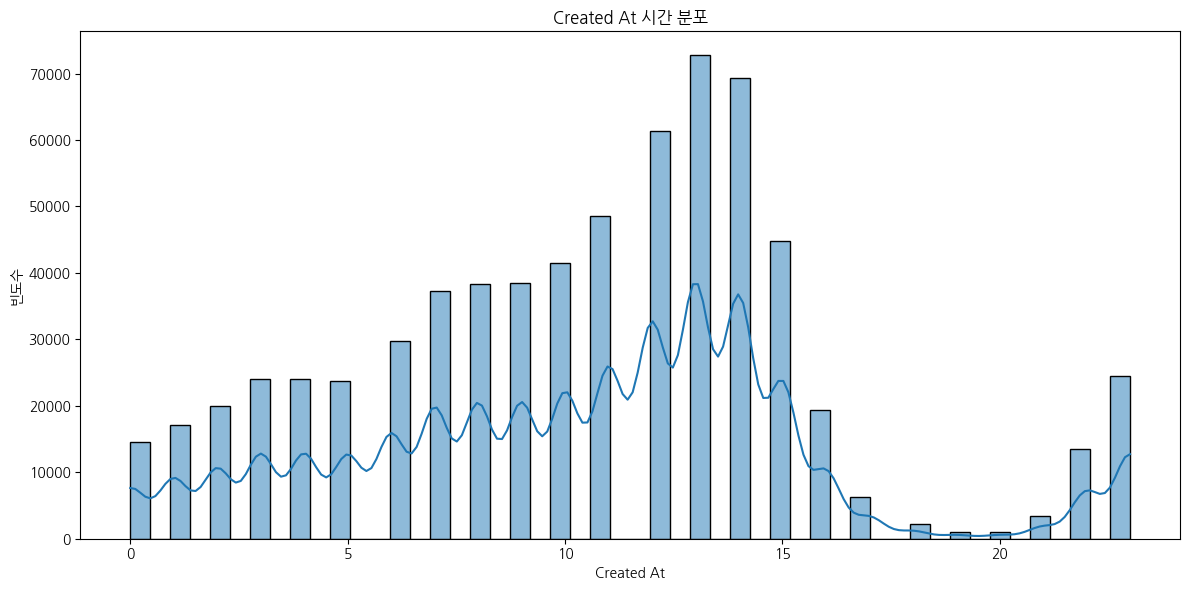

In [5]:
# 복사본 제작을 위해서
accounts_user = df_dict["accounts_user"].copy()
display(accounts_user.head())

# 우선 데이터 타입 확인
print("accounts_user 데이터 타입 확인")
print(accounts_user.dtypes)

# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

In [6]:
# 그렇다면 hackle 데이터에서 event_key가 "complete_signup"인 데이터 추출해서 시간대 분포 확인
# hackle 데이터 불러오기

## GCS에서 데이터 불러오기
final_hackle_df = pd.read_parquet(
    "gs://my-advanced-data-bucket/final_hackle/final.parquet",
    storage_options={"token": "/home/sungcheol/codeit_project/codeit_project/config/key.json"}
)

display(final_hackle_df.head())

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


In [7]:
# 데이터 타입 확인
print("final_hackle_df 데이터 타입 확인")
print(final_hackle_df.dtypes)

# 데이터 크기 확인
print("final_hackle_df 데이터 크기 확인")
print(final_hackle_df.shape)

# event_key가 "complete_signup"인 데이터 추출
complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# 데이터 크기 확인
print("complete_signup_df 데이터 크기 확인")
print(complete_signup_df.shape)

final_hackle_df 데이터 타입 확인
event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
friend_count             float64
question_id              float64
heart_balance            float64
id                         int64
user_id                   object
device_id                 object
osname                    object
osversion                 object
dtype: object
final_hackle_df 데이터 크기 확인
(11406944, 12)
complete_signup_df 데이터 크기 확인
(974, 12)


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
13637,aef1aa85-4b53-4576-8a59-898c621bd8ea,2023-07-21 14:47:08,complete_signup,e118e264-5b37-4b29-9f65-737e614e6614,0.0,NaN,300.0,32,1579202,e118e264-5b37-4b29-9f65-737e614e6614,Android,13
31989,ddf14897-2a99-433d-bbe5-a5e32c83aefd,2023-07-18 11:26:59,complete_signup,83147b91-46d9-4060-b803-d0acfc8750b7,0.0,NaN,300.0,78,1578984,83147b91-46d9-4060-b803-d0acfc8750b7,Android,13
41705,9f57eccd-0be3-4256-bbd7-0aa5ea2f31cc,2023-07-18 15:54:53,complete_signup,CE0BB810-BE00-4C39-97AB-78F4E5D83285,0.0,NaN,300.0,103,1579005,CE0BB810-BE00-4C39-97AB-78F4E5D83285,iOS,16.5.1
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


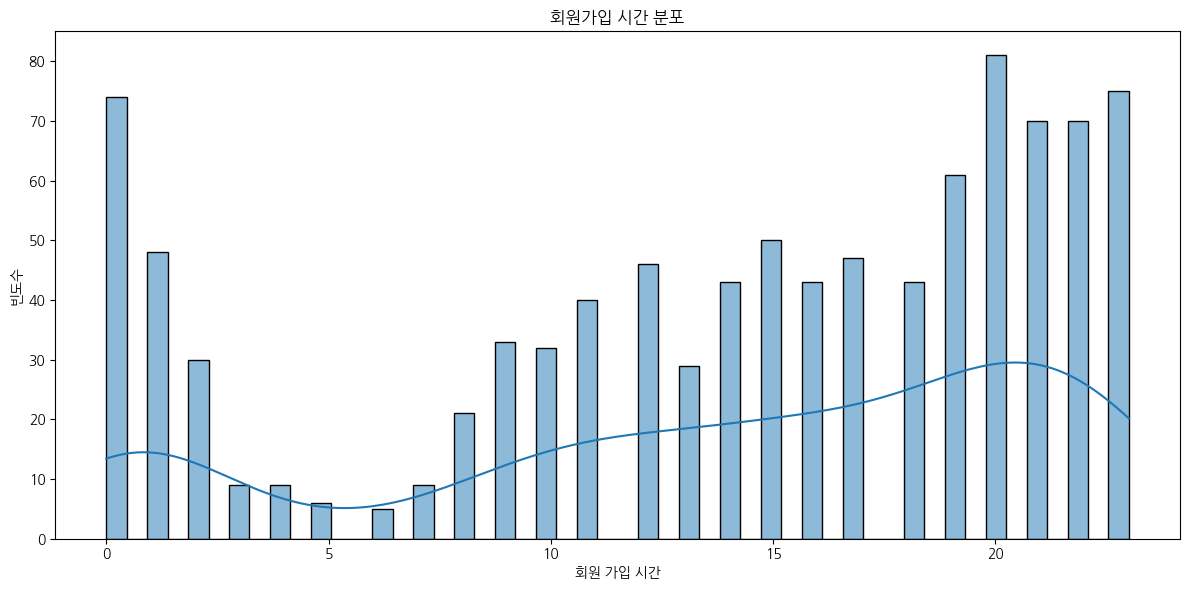

In [8]:
# 필터링한 데이터 확인
display(complete_signup_df.head())

# 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(complete_signup_df['event_datetime'].dt.hour, bins=50, kde=True)
plt.title('회원가입 시간 분포')
plt.xlabel('회원 가입 시간')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- created_at에 9시간을 더해야한다는 이유
    - hackle 데이터와 accounts_user 데이터 살펴보면 9시간 차이가 남
    - 그리고 물론 점심 시간에 회원가입? 가능하다고 생각됨 하지만 새벽 시간대에 이용하는 유저가 지나치게 많아짐

In [9]:
# 만약 account_user 데이터에 created_at에 9시간을 더하게 되면? 시간대 분포는?
accounts_user["created_at_plus_9"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

# 데이터 확인
display(accounts_user.head())

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,created_at_plus_9
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,2023-03-29 12:44:14.047130
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0,2023-03-29 14:18:56.162368
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0,2023-03-29 21:56:34.989468
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0,2023-03-29 21:56:35.020790
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0,2023-03-29 21:56:35.049311


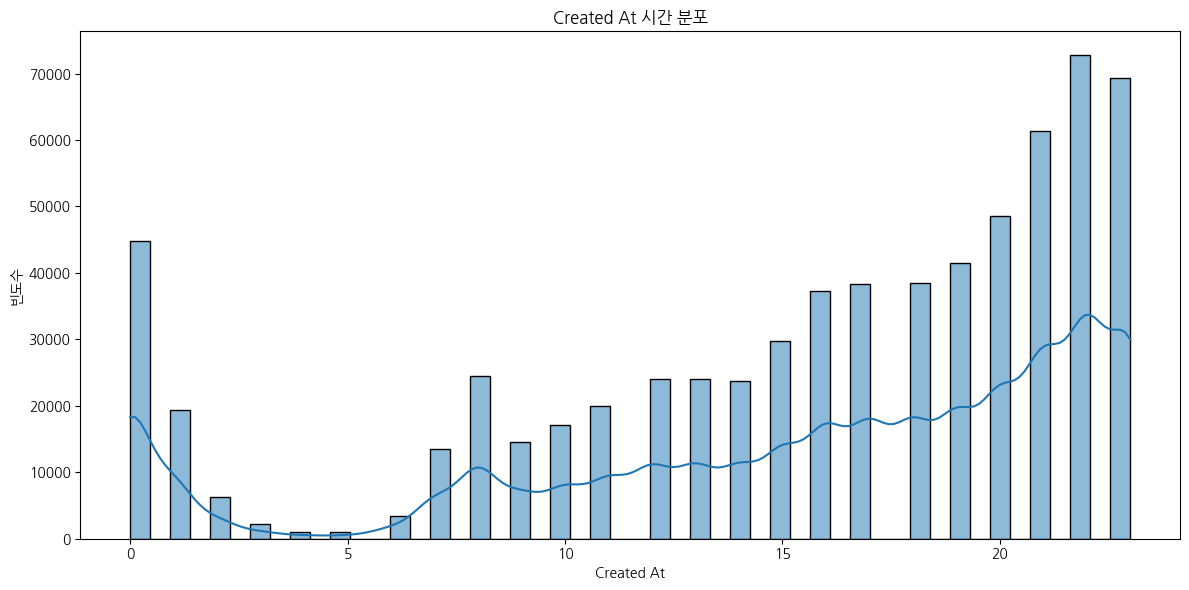

In [10]:
# 9시간을 더한 결과에 대해서 시각화 진행
# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at_plus_9'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- 위 내용을 통해서는 유저 획득이 오히려 밤에 이루어지는 경우가 존재함
- 저녁이나 밤에 활동이 많은 것은 확인함 그렇다면 점심이나 이른 시간대에는?
    - 방학이나 주말인 경우에 다를까?

### vote 데이터를 통한 전반적인 회원가입 유저 확인
---

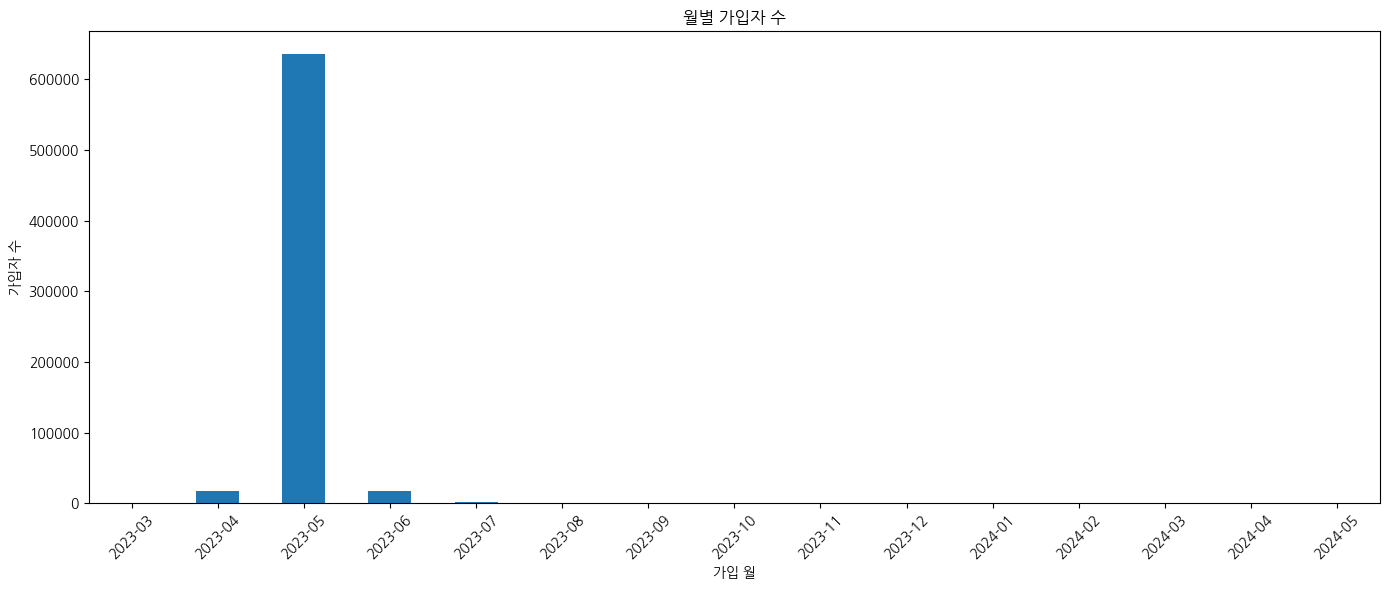

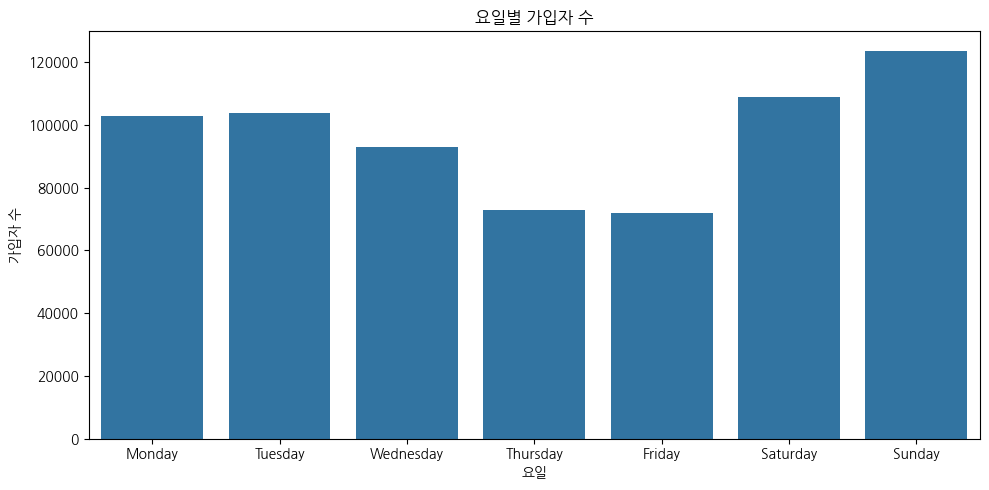

In [11]:
# 월별 가입자 수 집계 및 시각화
accounts_user['month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_counts = accounts_user.groupby('month').size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='bar')
plt.title('월별 가입자 수')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 요일별 가입자 수 집계 및 시각화
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = accounts_user['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('요일별 가입자 수')
plt.xlabel('요일')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/148434679.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='gender', palette='Set2')


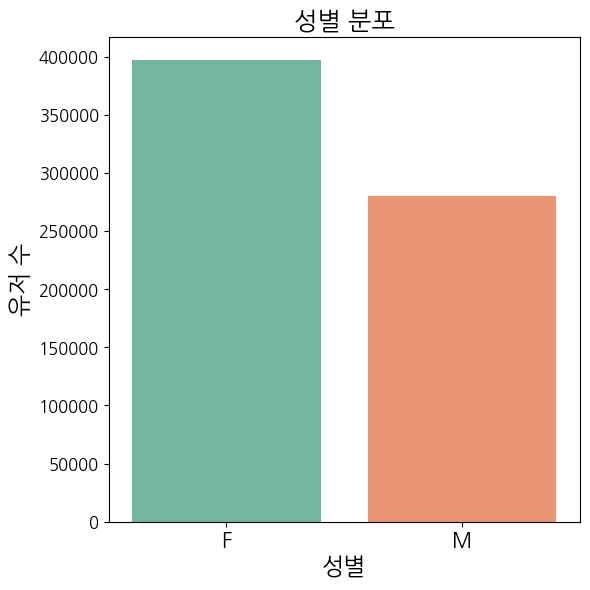

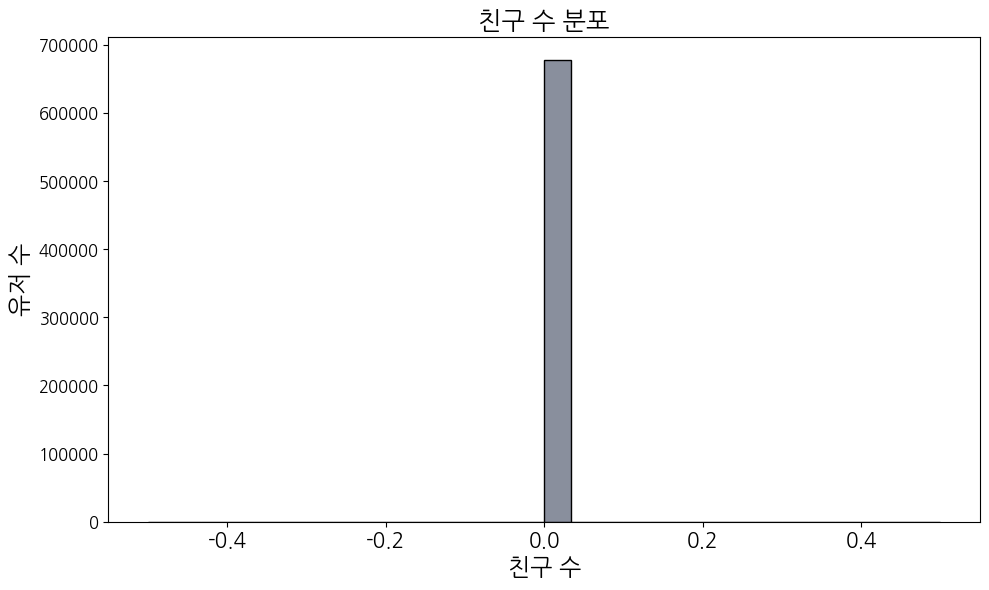

/tmp/ipykernel_203008/148434679.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')


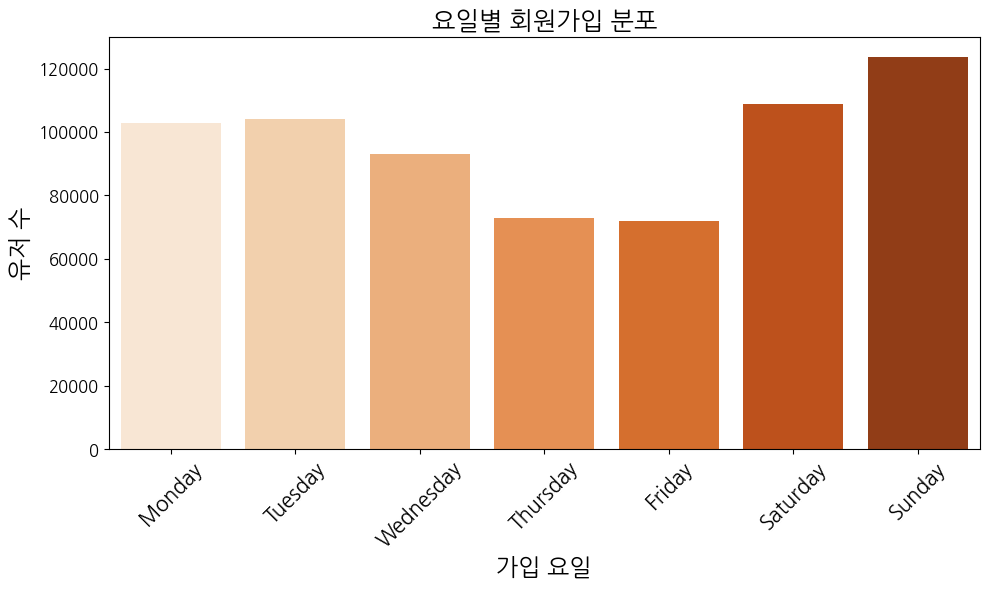

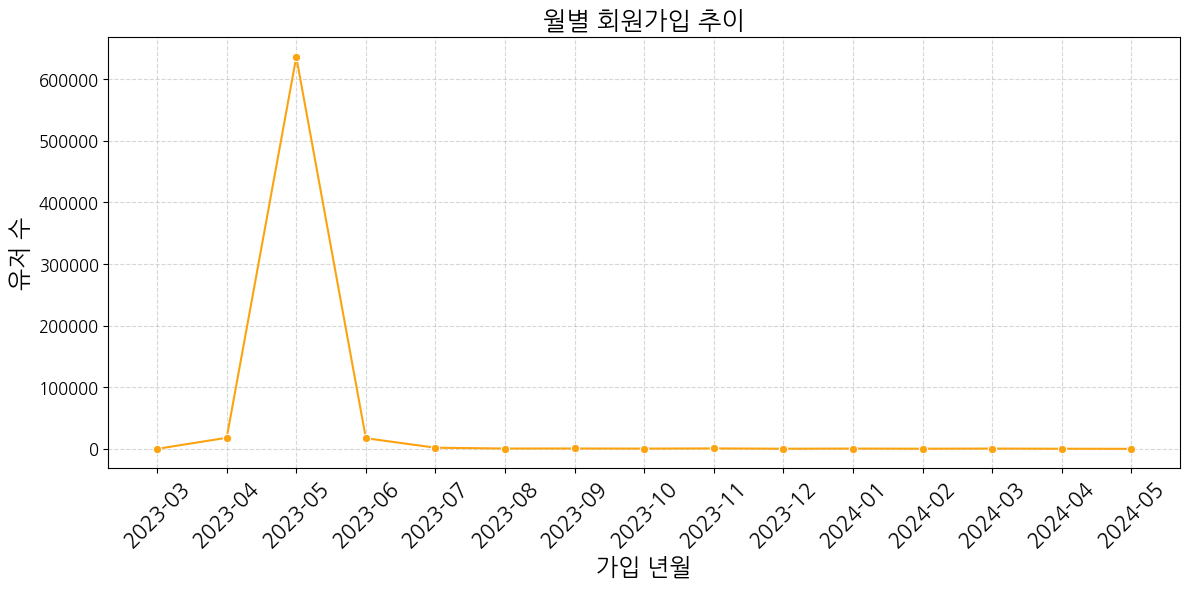

In [12]:
user_df = accounts_user.copy()

# 1. 가입 시간 정보 파싱
user_df['created_at_plus_9'] = pd.to_datetime(user_df['created_at_plus_9'])
user_df['signup_date'] = user_df['created_at_plus_9'].dt.date
user_df['signup_year_month'] = user_df['created_at_plus_9'].dt.to_period('M').astype(str)
user_df['signup_dayofweek'] = user_df['created_at_plus_9'].dt.day_name()

# 2. 친구 수 계산
user_df['friend_cnt'] = user_df['friend_id_list'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# 3. 성별 분포
plt.figure(figsize=(6, 6))
sns.countplot(data=user_df, x='gender', palette='Set2')
plt.title('성별 분포', fontsize=18)
plt.xlabel('성별', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 4. 친구 수 분포
plt.figure(figsize=(10, 6))
sns.histplot(user_df['friend_cnt'], bins=30, kde=True, color='#14213d')
plt.title('친구 수 분포', fontsize=18)
plt.xlabel('친구 수', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 5. 요일별 가입 분포
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')
plt.title('요일별 회원가입 분포', fontsize=18)
plt.xlabel('가입 요일', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 6. 월별 회원가입 추이
monthly_signup = user_df.groupby('signup_year_month')['id'].count().reset_index()
monthly_signup.columns = ['signup_year_month', 'user_count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_signup, x='signup_year_month', y='user_count', marker='o', color='#fca311')
plt.title('월별 회원가입 추이', fontsize=18)
plt.xlabel('가입 년월', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


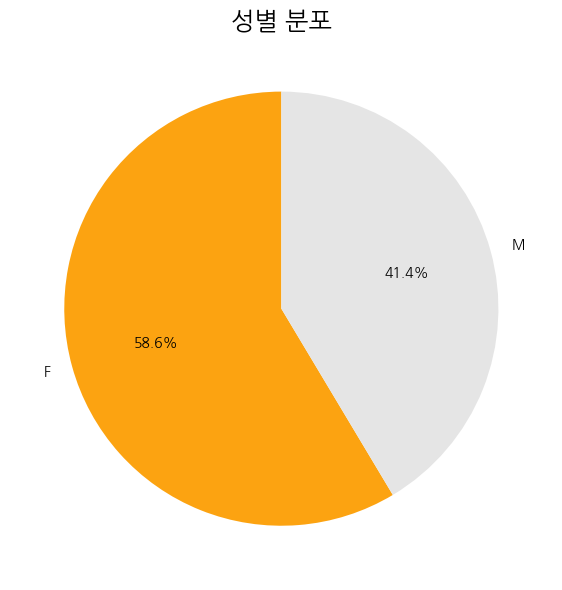

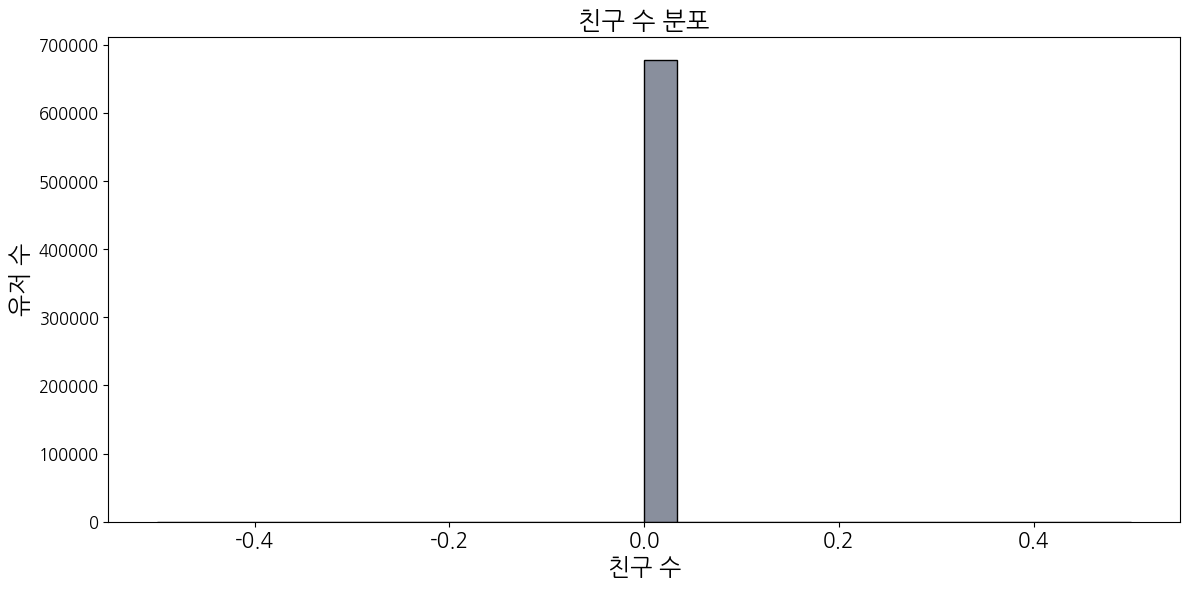

/tmp/ipykernel_203008/241296671.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')


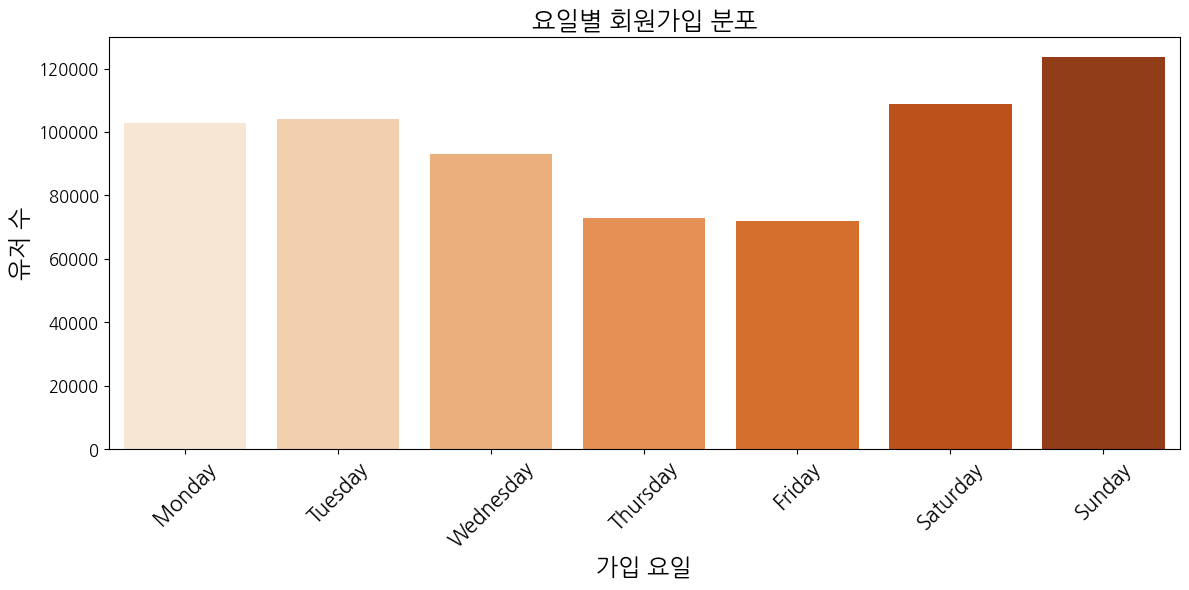

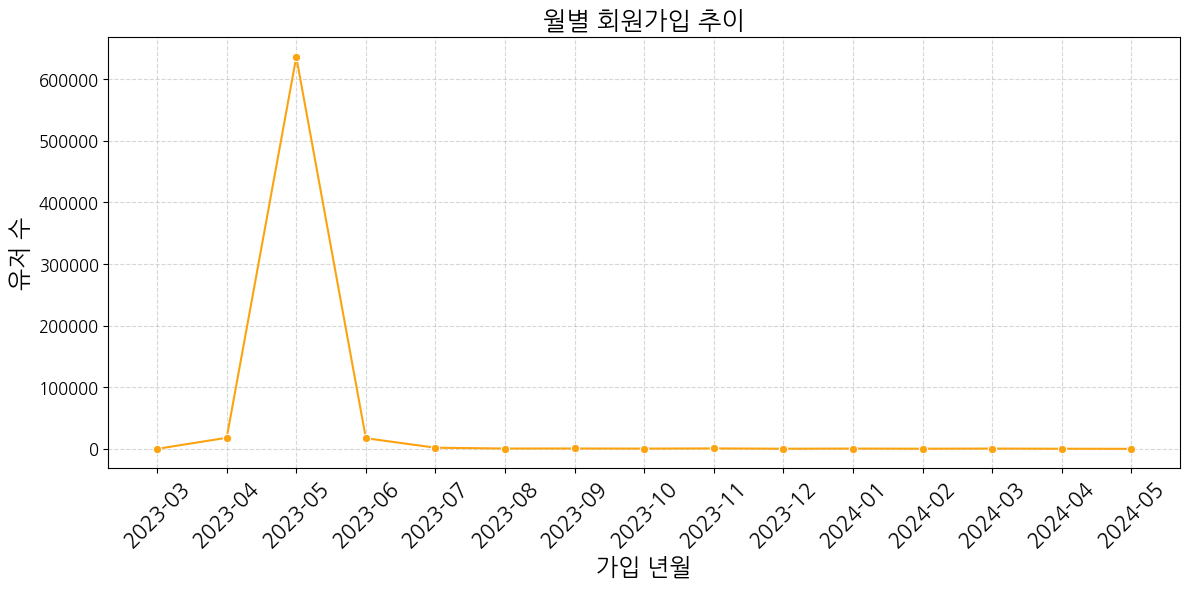

In [13]:
# 3. 성별 분포 (파이차트)
plt.figure(figsize=(6, 6))
gender_counts = user_df['gender'].value_counts()
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[ '#fca311', '#e5e5e5',"#14213d", '#2b2d42']
)
plt.title('성별 분포', fontsize=18)
plt.tight_layout()
plt.show()

# 4. 친구 수 분포 (히스토그램)
plt.figure(figsize=(12, 6))
sns.histplot(user_df['friend_cnt'], bins=30, kde=True, color='#14213d')
plt.title('친구 수 분포', fontsize=18)
plt.xlabel('친구 수', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 5. 요일별 가입 분포 (막대그래프)
plt.figure(figsize=(12, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')
plt.title('요일별 회원가입 분포', fontsize=18)
plt.xlabel('가입 요일', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 6. 월별 회원가입 추이 (라인그래프)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_signup,
    x='signup_year_month',
    y='user_count',
    marker='o',
    color='#fca311'
)
plt.title('월별 회원가입 추이', fontsize=18)
plt.xlabel('가입 년월', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/439690103.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


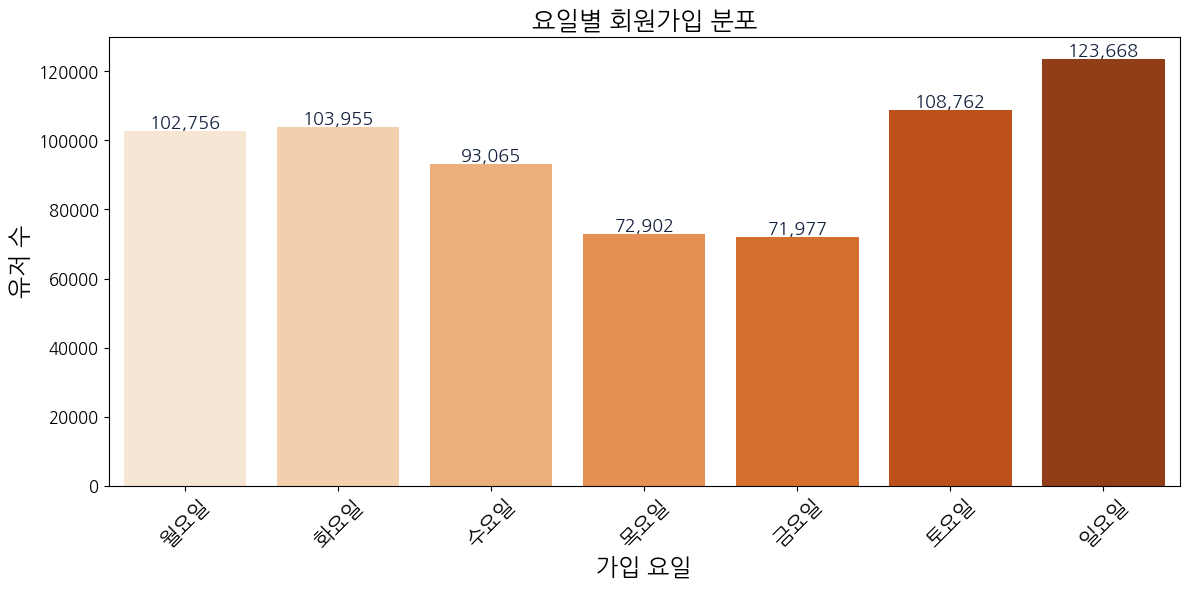

In [14]:
# 한글 요일 라벨 매핑
weekday_kor = {
    'Monday': '월요일',
    'Tuesday': '화요일',
    'Wednesday': '수요일',
    'Thursday': '목요일',
    'Friday': '금요일',
    'Saturday': '토요일',
    'Sunday': '일요일'
}
order_kor = [weekday_kor[wd] for wd in order]
user_df['signup_dayofweek_kor'] = user_df['signup_dayofweek'].map(weekday_kor)

# 요일별 가입 분포 (한글 라벨 + 바 위에 인원수 표시)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=user_df,
    x='signup_dayofweek_kor',
    order=order_kor,
    palette='Oranges'
)
plt.title('요일별 회원가입 분포', fontsize=18)
plt.xlabel('가입 요일', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()

# 바 위에 인원수 표시
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=13, color='#14213d')

plt.show()

/tmp/ipykernel_203008/2541859683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


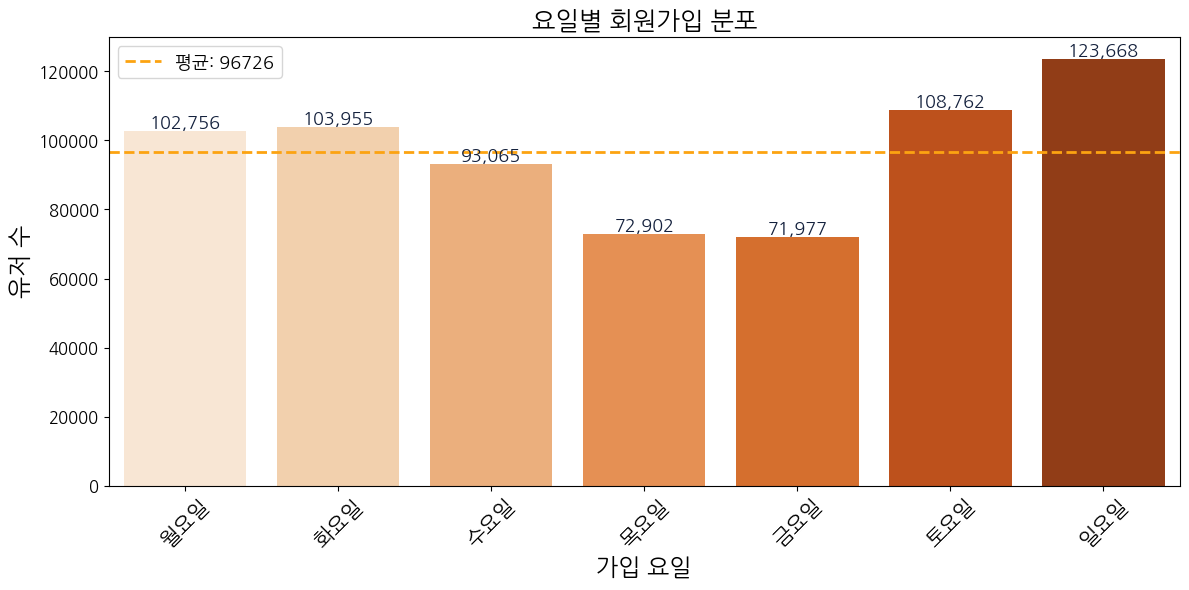

In [15]:
# 요일별 가입 분포 (한글 라벨 + 바 위에 인원수 표시 + 평균선)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=user_df,
    x='signup_dayofweek_kor',
    order=order_kor,
    palette='Oranges'
)
plt.title('요일별 회원가입 분포', fontsize=18)
plt.xlabel('가입 요일', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()

# 바 위에 인원수 표시
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=13, color='#14213d')

# 평균선 추가
mean_count = user_df['signup_dayofweek_kor'].value_counts().reindex(order_kor).mean()
ax.axhline(mean_count, color='#fca311', linestyle='--', linewidth=2, label=f'평균: {mean_count:.0f}')
ax.legend(fontsize=13)

plt.show()

#### 그래프 해석 및 인사이트

🔶 1. 성별 분포 파이차트        
여성(F): 약 58.6%       
남성(M): 약 41.4%

✅ 인사이트:        
사용자 기반에서 여성이 더 큰 비중을 차지하고 있음.      
이는 마케팅 및 커뮤니케이션 전략 수립 시 여성 타겟 중심의 접근이 효과적일 가능성을 시사함.      
남성 유저 유입을 높이기 위한 별도 전략 수립도 고려 가능.

🔶 2. 요일별 회원가입 분포 (막대 그래프)        
주말(토요일·일요일)의 가입자 수가 가장 많음.        
평일 중에는 화요일이 가장 높은 가입률을 보임.

✅ 인사이트:        
사용자들이 주말에 더 많이 가입하는 경향 → 여유 시간에 신규 유입이 집중됨.       
이를 반영하여 **주말에 집중적인 마케팅(광고 집행, 콘텐츠 노출)**을 기획할 수 있음.      
가입 시점과 첫 행동(예: 첫 투표/피드백) 사이의 시간 간격 분석도 연결해보면 좋음.

🔶 3. 월별 회원가입 추이 (꺾은선 그래프)        
2023년 5월에 가입자 수가 압도적으로 많음 (피크).        
이후에는 급격히 감소하여 낮은 수준을 유지.

✅ 인사이트:        
2023년 5월은 특수 이벤트 혹은 마케팅의 영향으로 유입이 급증했을 가능성이 있음.      
하지만 유지되지 못하고 6월부터 급감 → 피크 이후 리텐션, 온보딩, 첫 경험 설계 부족 가능성.       
피크 당시 유입된 유저들의 행동 및 리텐션 특성을 분석해, 이후 유저 대비 어떤 차이가 있었는지도 탐색 포인트.

또한, 데이터가 6월에 초점이 되는 단기성 어플이기 때문에 계절에 따른 영향을 확인할 수 없음

추가로 볼 내용들

- 페이지 흐름 분석 (Signup Funnel)      
회원가입 전 어떤 페이지(또는 행동)들을 거치는가?        
목적 : 이탈률이 높은 지점은 어디인가?       

- 가입 소요 시간 분석       
방문해서 가입하기까지 걸린 시간 분포        
목적 : 바로 가입 vs 여러 번 방문 후 가입 구분       

- 신규 가입자의 초기 행동       
가입 직후 유저가 어떤 행동을 했는가?        
"활성화(Activation)"로 넘어가는 힌트를 여기서 얻음      

## 앱을 시작하고 회원가입 시작하는데 걸리는 시간 구하기
---
- complete_signup을 가진 user_id 탐색하여 그 user_id 중 launch_app을 가진 user_id가 존재하는지 확인
- complete_signup이 launch_app 보다 앞에 있는 경우가 존재하는지 확인
- 두 event 사이 시간 구하기

#### 그 전 session_id에 대해서 signup과 user_id에 따른 차이가 있을까?

In [16]:
# 회원가입 전 event_key의 흐름을 파악하기 위해, 회원가입 완료 이벤트("complete_signup")가 발생한 session_id를 추출
signup_sessions = complete_signup_df['session_id'].unique()

# 해당 session_id에 속한 모든 이벤트를 추출
signup_sessions_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_sessions)].copy()

# 각 session별로 event_key의 순서를 확인
signup_sessions_events_sorted = signup_sessions_events.sort_values(['session_id', 'event_datetime'])

# 예시: 한 session의 event_key 시퀀스 확인
example_session_id = signup_sessions_events_sorted['session_id'].iloc[0]
example_session_events = signup_sessions_events_sorted[signup_sessions_events_sorted['session_id'] == example_session_id]['event_key'].tolist()
print(f"Example session ({example_session_id}) event sequence:")
print(example_session_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)

# session별 event_key 시퀀스 추출
session_event_sequences = (
    signup_sessions_events_sorted.groupby('session_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = session_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences:")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example session (00181B41-078B-4CA0-815F-72D24E5DDF9A) event sequence:
['launch_app', '$session_end', 'launch_app', '$session_start', '$session_end', 'launch_app', 'launch_app', '$session_start', '$session_start', 'launch_app', 'launch_app', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', '$session_end', 'view_signup', '$session_start', 'complete_signup', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'click_bottom_navigation_questions', 'click_bottom_navigation_profile', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'view_timeline_tap', 'view_timeline_tap', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_questions', 'view_timeline_tap', 'click_question_start', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_profile', 'view_timeline_tap', 'view_lab_tap', 'click_bottom_navigation_questions', 'view_timeline_tap', 'c

In [17]:
# event_key가 'complete_signup'인 데이터 중 user_id가 있는 경우와 없는 경우 수 파악
complete_signup_events = signup_sessions_events[signup_sessions_events['event_key'] == 'complete_signup']

user_id_exists = complete_signup_events['user_id'].notnull().sum()
user_id_missing = complete_signup_events['user_id'].isnull().sum()

print(f"user_id가 있는 경우: {user_id_exists}건")
print(f"user_id가 없는 경우: {user_id_missing}건")

user_id가 있는 경우: 974건
user_id가 없는 경우: 0건


In [18]:
# complete_signup 바로 직전 event_key를 찾기 위한 코드

# session_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# session_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_sessions_events_sorted.groupby('session_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 534회
$session_end: 307회
view_signup: 133회


In [19]:
# event_key가 complete_signup인 경우의 행이 얼마나 되는지
# 이거는 같은 session_id에 대해서 같은 complete_signup이 잇을 수 잇음음
print(f"이벤트 키가 complete_signup인 경우 : {final_hackle_df[final_hackle_df.event_key == "complete_signup"].shape[0]}")

이벤트 키가 complete_signup인 경우 : 974


- event_key가 "session_start"와 "complete_signup" 의 차이를 구하기엔 위 내용처럼 complete_signup 바로 직전에 오는 경우가 존재하여 구하고자 하는 값이 제대로 구해지지 않을 것이기에 -> launch_app을 기준으로 하게 된다면?
- 그러기 위해서 우선 complete_signup을 가진 session_id에 모두 "complete_signup"이 존재하는지 확인

In [20]:
# "complete_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"이 있는 session_id 중 "launch_app"이 없는 session_id 개수
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" session 중 "launch_app"이 없는 session 수: {num_sessions_without_launch_app}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 없는 session 수: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 있는 session 수: {num_sessions_with_launch_app_before}')

"complete_signup" session 중 "launch_app"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 없는 session 수: 3
"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 있는 session 수: 970


In [21]:
# complete_signup 이전에 launch_app이 없는 session_id 추출
sessions_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup 이전에 launch_app이 없는 session_id 수: {len(sessions_without_launch_app_before)}")
print("예시 session_id 5개:", sessions_without_launch_app_before[:5])

# 해당 session의 이벤트 시퀀스 예시 출력
for session_id in sessions_without_launch_app_before[:3]:
    events = signup_sessions_all_events[signup_sessions_all_events['session_id'] == session_id].sort_values('event_datetime')
    print(f"\nSession ID: {session_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup 이전에 launch_app이 없는 session_id 수: 3
예시 session_id 5개: ['96C2C47D-7BC2-4144-8AC6-1FADE599F10A', 'B941F9F9-CF53-4DAE-A204-75E666B5D277', 'FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72']

Session ID: 96C2C47D-7BC2-4144-8AC6-1FADE599F10A
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30:52                      view_signup
4430953 2023-08-05 16:31:11                      view_signup
4430959 2023-08-05 16:31:13                      view_signup
...                     ...                              ...
4430922 2023-08-08 12:28:30              click_question_open
4430945 2023-08-08 12:28:42  click_bottom_navigation_profile
4430941 2023-08-08 12:28:42                view_timeline_tap
4430961 2023-08-08 12:28:42                 view_profile_tap
4430918 2023-08-08 12:28:42                     view_lab_tap

[66 rows x 2 columns]

Sess

In [22]:
# session_id 컬럼과 리스트 값 모두 str로 변환 및 strip 처리
final_hackle_df['session_id'] = final_hackle_df['session_id'].astype(str).str.strip()
sessions_without_launch_app_before = [str(s).strip() for s in sessions_without_launch_app_before]

for id in sessions_without_launch_app_before:
    print(f"session_id : {id}")
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "launch_app")])
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "complete_signup")])

session_id : 96C2C47D-7BC2-4144-8AC6-1FADE599F10A


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
4430957,8df748d5-4c63-40c1-8e24-32a8885d1e9d,2023-08-08 12:27:54,launch_app,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,51.0,NaN,1213.0,282944,1579742,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,iOS,16.6


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
4430971,d6ac0ed4-91b4-4c4c-8b58-b850934b30f0,2023-08-05 16:32:17,complete_signup,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,0.0,NaN,300.0,282944,1579742,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,iOS,16.6


session_id : B941F9F9-CF53-4DAE-A204-75E666B5D277


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
47355,06587f8b-d740-480d-94e4-3e299f6ee0fb,2023-08-07 12:00:41,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47357,069451e6-8fbf-4d61-ab7a-54b42641a551,2023-08-05 12:05:43,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47367,072a5918-b3a7-4d27-9793-a1f28bf844b6,2023-07-23 04:01:05,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47371,07aaa629-2aa1-4e93-97a6-68621630fff4,2023-08-07 19:50:34,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47373,07beb114-1f74-4f79-a01b-753323a651d2,2023-08-05 22:31:57,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...
49215,f434ad7b-a668-4052-a472-f1080dcf70ac,2023-07-24 01:14:24,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49240,f6df1394-8688-4ab3-bd41-b55bd1e35473,2023-07-24 03:23:16,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49265,fa6d9115-593e-4147-a246-4fd8dd74f2e4,2023-08-02 14:06:16,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49272,fb97b454-a4b4-46d0-846a-2d027379c08b,2023-07-25 11:32:29,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


session_id : FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
764183,04b3595a-24ce-4f45-8eaf-033ecaf94c92,2023-07-22 11:32:18,launch_app,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,597.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1
764235,9c3b0cbb-5e8a-4dd1-bc14-8d3723e6a9ef,2023-07-22 11:31:53,launch_app,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,300.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
764220,6da2dcab-01d5-4fb5-b8f9-97c5fd43958e,2023-07-20 20:52:54,complete_signup,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,300.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1


launch_app이 complete_signup보다 늦은 경우들이 식별되었는데 그 중 한 session_id에 대해서는 complete_signup이 여러 값을 가짐     
- 이 친구들은 session_id로 분석할 시에 이상치로 판단 및 제거를 할지 고민해봐야함

launch_app → complete_signup 평균 소요 시간: 664.93분
launch_app → complete_signup 중앙값 소요 시간: 2.02분


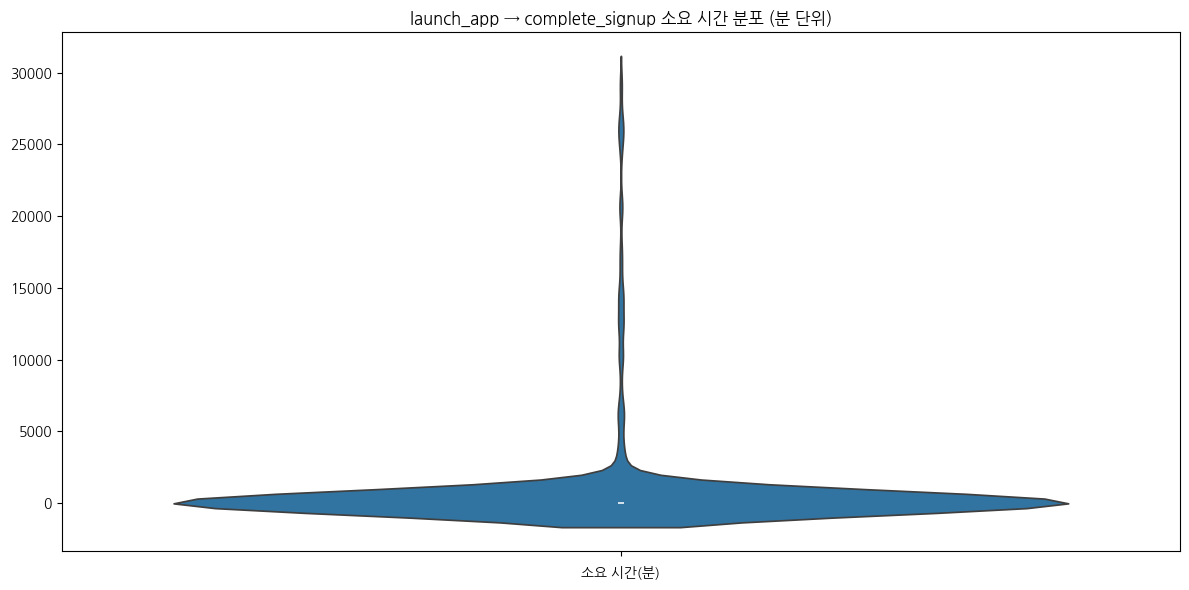

In [23]:
# session_id별로 launch_app과 complete_signup의 시간 차이 구하기 (launch_app이 complete_signup보다 앞선 경우만)

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 launch_app, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # launch_app이 complete_signup보다 앞선 경우만
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"launch_app → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

In [24]:
# 만약 view_signup을 기준으로 하게 된다면?
# 일단 complete_signup 을 가진 session_id들 중 view_signup 가지지 않은 session_id 잇는지 확인

# "complete_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "view_signup" 이벤트가 존재하는지 확인
has_view_signup = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"이 있는 session_id 중 "view_signup"이 없는 session_id 개수
num_sessions_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" session 중 "view_signup"이 없는 session 수: {num_sessions_without_view_signup}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "view_signup"이 있었는지 확인
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 view_signup이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_sessions_all_events.groupby('session_id').apply(view_signup_before_signup)
num_sessions_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 없는 session 수: {num_sessions_without_view_signup_before}')
num_sessions_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 있는 session 수: {num_sessions_with_view_signup_before}')

"complete_signup" session 중 "view_signup"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 있는 session 수: 973


view_signup → complete_signup 평균 소요 시간: 167.11분
view_signup → complete_signup 중앙값 소요 시간: 1.52분


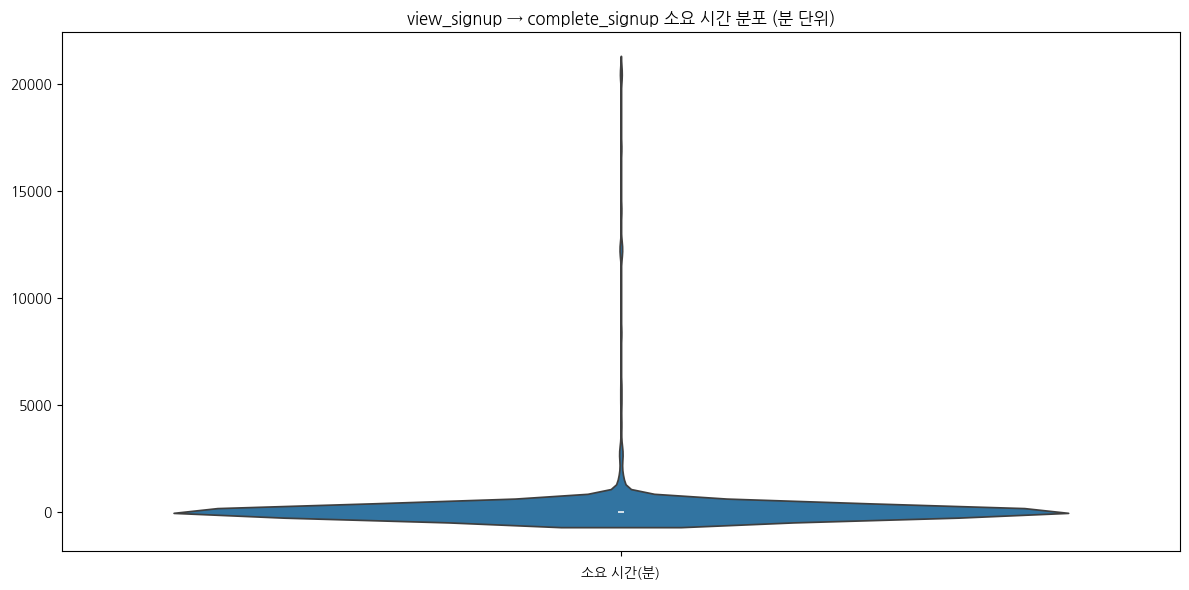

In [25]:
# 해당 결과로는 view_signup이 모두 complete_signup 이전에 있기 때문에 이상이 없음
# session_id 별로 view_signup과 complete_signup 시간 차이 구하기

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 view_signup, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # view_signup이 complete_signup보다 앞선 경우만
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

#### view_signup 에서 가장 먼저 나온 값 -> complete_signup 에서 가장 나중에 나온 값
---
- view_signup 에서 첫번재 값은 회원가입을 시도한 것으로 확인 가능
- complete_signup 마지막 값은 회원가입이 최종적으로 완료되었다고 판단 가능

view_signup → complete_signup 평균 소요 시간: 196.39분
view_signup → complete_signup 중앙값 소요 시간: 1.52분


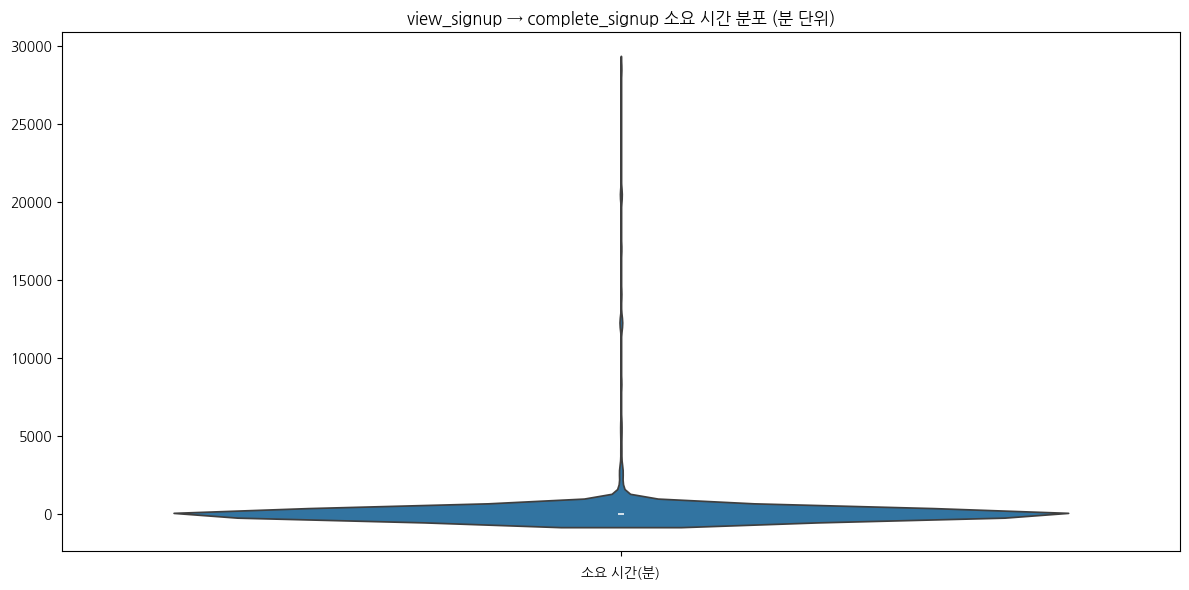

In [26]:
# 해당 결과로는 view_signup이 모두 complete_signup 이전에 있기 때문에 이상이 없음
# session_id 별로 view_signup과 complete_signup 시간 차이 구하기
# view_signup에서는 가장 첫번째 값으로 하고 complete_signup는 가장 마지막 값으로 하여 차이 확인인

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 view_signup, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    last_signup = signup_times.iloc[-1]
    # view_signup이 complete_signup보다 앞선 경우만
    if first_launch < last_signup:
        return (last_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

- 위 결과를 보면 view_signup -> complete_signup 까지 걸리는 시간의 중앙값은 1.52분으로 대략 2분 경과하는 것으로 보임
- launch_app -> complete_signup 을 통해서 앱을 실행하고 회원가입까지 하는데 걸리는 시간은 중앙값은 2.02분으로 대략 2분 경과
-> 이를 통해서 앱을 실행하고 얼마 되지 않아 바로 회원가입하는 유저들이 많을 것으로 유추 가능
- 그렇다면 launch_app -> view_signup까지는 주로 경로는 어떻게 되는걸까?
    - 회원가입하기 전에 뭔가 더 둘러보는 유저는 없는걸까?

+ 추가로 user_id로 살펴볼 필요가 있겠다 지금까지 session_id로 봤는데 user_id로 보면 달라질까?       
- user가 두 번 회원가입하는 경우가 존재하는가?
- session_id로 봤을때랑은 달라지는가?


## user_id로 변경하였을 때 결과가 달라지는가에 대한 탐색
---

In [27]:
# 동일한 user_id에 대해 complete_signup 이벤트가 2번 이상 발생한 경우 확인
user_signup_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].groupby('user_id').size()
multiple_signup_users = user_signup_counts[user_signup_counts > 1]

print(f"complete_signup 이벤트가 2번 이상 발생한 user_id 수: {len(multiple_signup_users)}")
print("예시 user_id 및 발생 횟수:")
print(multiple_signup_users.head())

complete_signup 이벤트가 2번 이상 발생한 user_id 수: 2
예시 user_id 및 발생 횟수:
user_id
1579289    2
1579831    2
dtype: int64


In [28]:
# 해당 유저들 확인

display(final_hackle_df[(final_hackle_df.user_id == '1579289') & (final_hackle_df.event_key == "complete_signup")])
display(final_hackle_df[(final_hackle_df.user_id == '1579831') & (final_hackle_df.event_key == "complete_signup")])

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
1131382,774bede5-4c42-44f7-b0a2-0ee47ffe298b,2023-07-22 21:18:13,complete_signup,aca1b21d-cfe2-4089-9379-0faf9ab6107f,0.0,NaN,300.0,87102,1579289,aca1b21d-cfe2-4089-9379-0faf9ab6107f,Android,10
1734311,636e920e-8772-42fc-84e8-e338667cf9d6,2023-07-22 21:11:16,complete_signup,a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8,0.0,NaN,300.0,225751,1579289,a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8,Android,10


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


In [29]:
ex = final_hackle_df[final_hackle_df["user_id"] == "1579831"].sort_values(by="event_datetime")

# 'ex'의 event_datetime 컬럼에서 날짜별(event_date) 이벤트 수 집계
ex['event_date'] = ex['event_datetime'].dt.date
date_event_counts = ex.groupby('event_date').size()

print(date_event_counts)

event_date
2023-07-19    188
2023-07-23    198
2023-07-24    180
2023-07-25    175
2023-07-26     98
2023-07-27     79
2023-07-29     57
2023-07-30     44
2023-07-31     15
2023-08-01     40
2023-08-02     79
2023-08-04    141
2023-08-05    256
2023-08-06     92
2023-08-07    222
2023-08-08     90
2023-08-09     43
dtype: int64


In [30]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# complete_signup_df에서 제외할 user_id를 제외
filtered_signup_df = complete_signup_df[~complete_signup_df['user_id'].isin(exclude_user_ids)]

# 회원가입 완료 이벤트("complete_signup")가 발생한 user_id 추출
signup_users = filtered_signup_df['user_id'].unique()

# 해당 user_id에 속한 모든 이벤트를 추출
signup_users_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_users)].copy()

# 각 user별로 event_key의 순서를 확인
signup_users_events_sorted = signup_users_events.sort_values(['user_id', 'event_datetime'])

# 예시: 한 user의 event_key 시퀀스 확인
example_user_id = signup_users_events_sorted['user_id'].iloc[0]
example_user_events = signup_users_events_sorted[signup_users_events_sorted['user_id'] == example_user_id]['event_key'].tolist()
print(f"Example user ({example_user_id}) event sequence:")
print(example_user_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)
# user별 event_key 시퀀스 추출
user_event_sequences = (
    signup_users_events_sorted.groupby('user_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = user_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences (by user):")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example user (1006061) event sequence:
['launch_app', '$session_start', 'launch_app', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_attendance', 'launch_app', 'click_question_ask', 'click_bottom_navigation_timeline', 'click_bottom_navigation_lab', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', '$session_end', 'launch_app', '$session_start', 'click_appbar_alarm_center', '$session_end', 'launch_app', '$session_start', 'click_question_share', 'click_question_open', 'click_question_share', 'click_attendance', 'click_question_start', 'skip_question', 'skip_question', 'skip_question', 'complete_question', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click

/tmp/ipykernel_203008/1795809564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sequence_labels, x=sequence_values, palette='Blues_d')


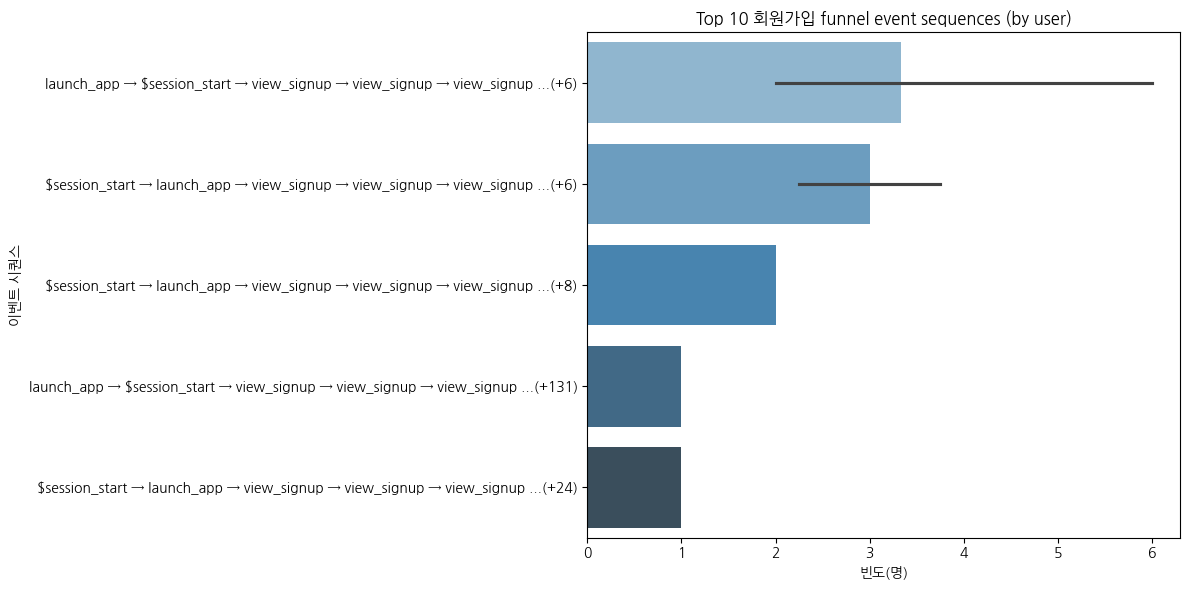

In [31]:
# Top 10 회원가입 funnel event sequence 시각화

import matplotlib.pyplot as plt

# 시퀀스를 문자열로 변환 (가독성 위해 5개까지만 표시)
def sequence_to_str(seq, max_len=5):
    if len(seq) > max_len:
        return ' → '.join(seq[:max_len]) + f' ...(+{len(seq)-max_len})'
    return ' → '.join(seq)

sequence_labels = [sequence_to_str(seq) for seq in sequence_counts.index]
sequence_values = sequence_counts.values

plt.figure(figsize=(12, 6))
sns.barplot(y=sequence_labels, x=sequence_values, palette='Blues_d')
plt.title('Top 10 회원가입 funnel event sequences (by user)')
plt.xlabel('빈도(명)')
plt.ylabel('이벤트 시퀀스')
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/845283471.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sequence_labels, x=sequence_values, palette=bar_colors)
/tmp/ipykernel_203008/845283471.py:18: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(y=sequence_labels, x=sequence_values, palette=bar_colors)


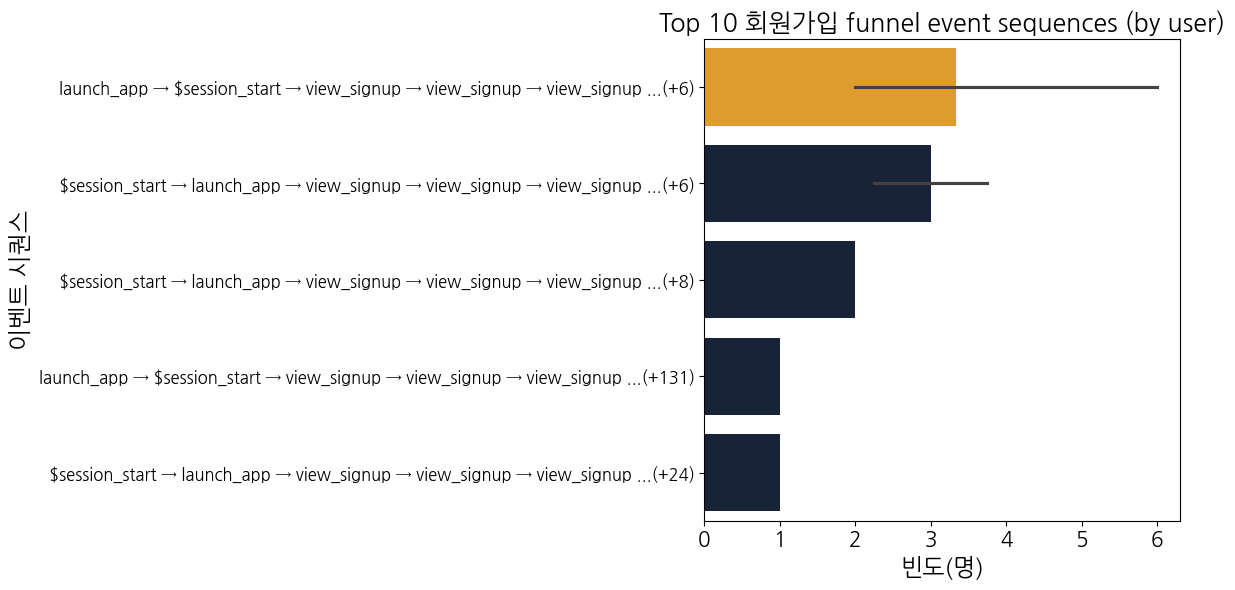

In [32]:
# Top 10 회원가입 funnel event sequence 시각화 (디자인/폰트/컬러 규격 적용)

# 시퀀스를 문자열로 변환 (가독성 위해 5개까지만 표시)
def sequence_to_str(seq, max_len=5):
    if len(seq) > max_len:
        return ' → '.join(seq[:max_len]) + f' ...(+{len(seq)-max_len})'
    return ' → '.join(seq)

sequence_labels = [sequence_to_str(seq) for seq in sequence_counts.index]
sequence_values = sequence_counts.values

# 컬러 템플릿: 기본 '#14213d', 강조 '#fca311'
bar_colors = ['#14213d'] * len(sequence_labels)
if len(bar_colors) > 0:
    bar_colors[0] = '#fca311'  # 최상위 1개 강조

plt.figure(figsize=(12, 6))
sns.barplot(y=sequence_labels, x=sequence_values, palette=bar_colors)
plt.title('Top 10 회원가입 funnel event sequences (by user)', fontsize=18)
plt.xlabel('빈도(명)', fontsize=17)
plt.ylabel('이벤트 시퀀스', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# complete_signup 바로 직전 event_key를 찾기 위한 코드

# user_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# user_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_users_events_sorted.groupby('user_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 531회
$session_end: 307회
view_signup: 132회


In [34]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" 이벤트가 있는 user_id 추출 (제외 대상 제외)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# 해당 user_id의 모든 이벤트 추출
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# 각 user_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"이 있는 user_id 중 "launch_app"이 없는 user_id 개수
num_users_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" user 중 "launch_app"이 없는 user 수: {num_users_without_launch_app}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_users_all_events.groupby('user_id').apply(launch_app_before_signup)
num_users_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 없는 user 수: {num_users_without_launch_app_before}')
num_users_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 있는 user 수: {num_users_with_launch_app_before}')

"complete_signup" user 중 "launch_app"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 없는 user 수: 2
"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 있는 user 수: 968


In [35]:
# complete_signup 이전에 launch_app이 없는 user_id 추출
users_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup 이전에 launch_app이 없는 user_id 수: {len(users_without_launch_app_before)}")
print("예시 user_id 5개:", users_without_launch_app_before[:5])

# 해당 user의 이벤트 시퀀스 예시 출력
for user_id in users_without_launch_app_before[:3]:
    events = signup_users_all_events[signup_users_all_events['user_id'] == user_id].sort_values('event_datetime')
    print(f"\nuser ID: {user_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup 이전에 launch_app이 없는 user_id 수: 2
예시 user_id 5개: ['1579154', '1579742']

user ID: 1579154
            event_datetime                  event_key
764190 2023-07-20 20:48:01             $session_start
764236 2023-07-20 20:48:37                view_signup
764200 2023-07-20 20:48:43                view_signup
764227 2023-07-20 20:48:46                view_signup
764221 2023-07-20 20:48:49                view_signup
...                    ...                        ...
764194 2023-07-22 11:32:45  click_appbar_alarm_center
764252 2023-07-22 11:32:47    click_appbar_chat_rooms
764198 2023-07-22 11:32:50               $session_end
764185 2023-07-22 11:32:50       click_appbar_setting
764205 2023-07-22 11:33:08             $session_start

[82 rows x 2 columns]

user ID: 1579742
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30

launch_app → complete_signup 평균 소요 시간: 669.63분
launch_app → complete_signup 중앙값 소요 시간: 2.01분


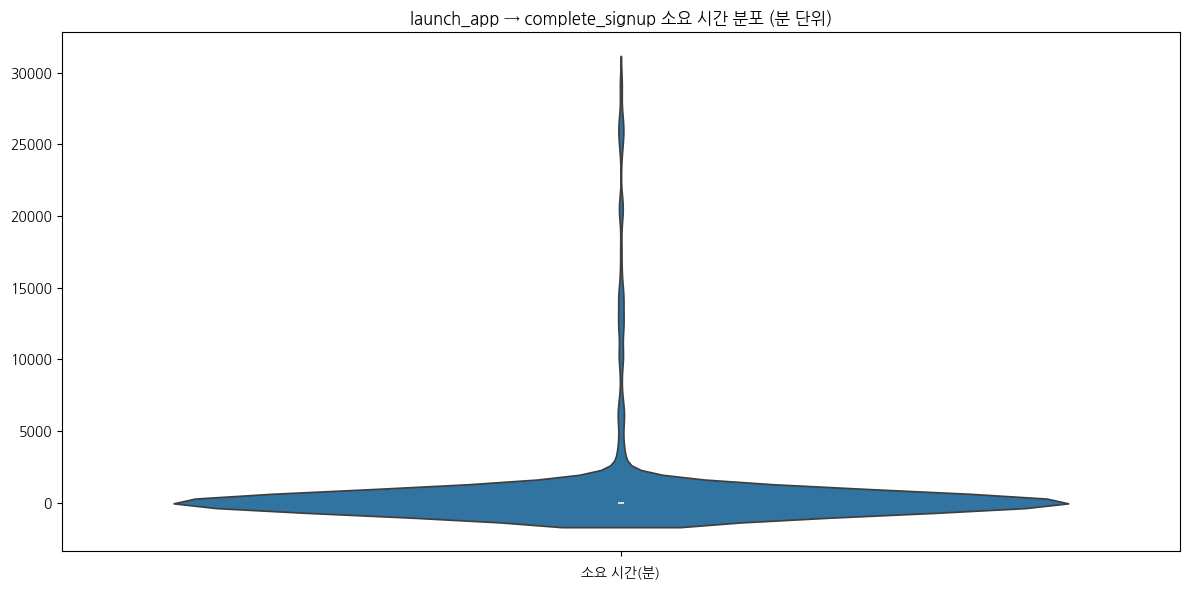

In [36]:
# 제외할 user_id 리스트 (두 번 회원가입한 유저 + launch_app 없는 유저)
exclude_user_ids = ['1579289', '1579831'] + users_without_launch_app_before

# 제외 대상이 아닌 user_id만 추출
filtered_signup_users = [uid for uid in signup_users if uid not in exclude_user_ids]

# 해당 user_id의 모든 이벤트 추출
filtered_signup_users_events = signup_users_all_events[signup_users_all_events['user_id'].isin(filtered_signup_users)].copy()

# user_id별로 launch_app과 complete_signup의 시간 차이 계산 (launch_app이 complete_signup보다 앞선 경우만)
def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

time_diffs = (
    filtered_signup_users_events.groupby('user_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"launch_app → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

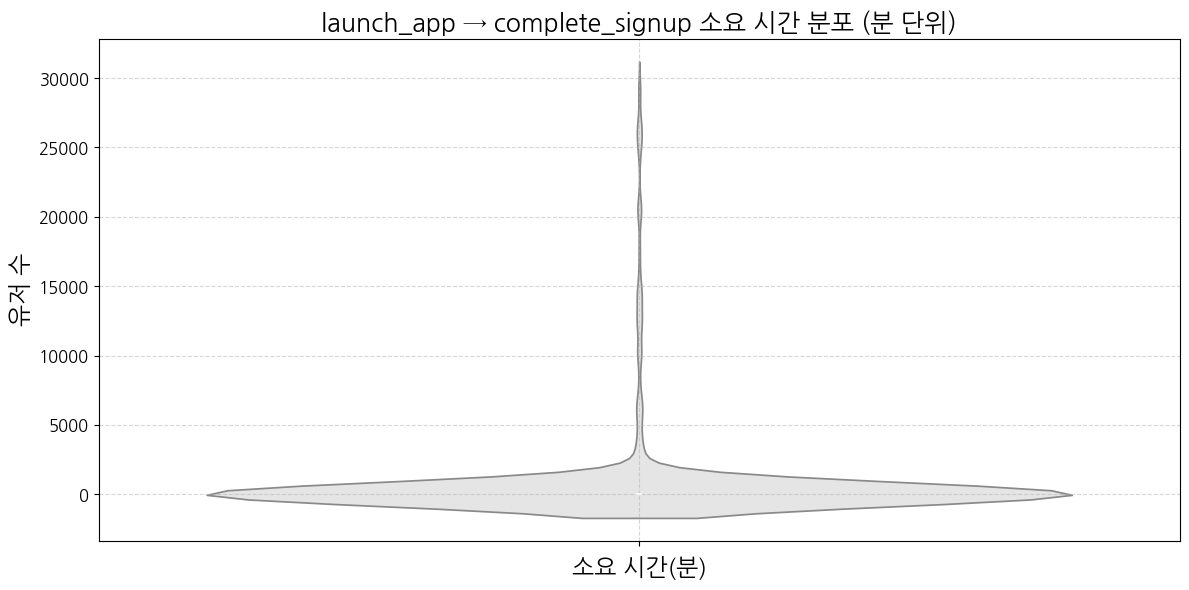

In [37]:
# launch_app → complete_signup 소요 시간 분포 (디자인/폰트/컬러 규격 적용)

plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs, color='#e5e5e5')
plt.title('launch_app → complete_signup 소요 시간 분포 (분 단위)', fontsize=18)
plt.xlabel('소요 시간(분)', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

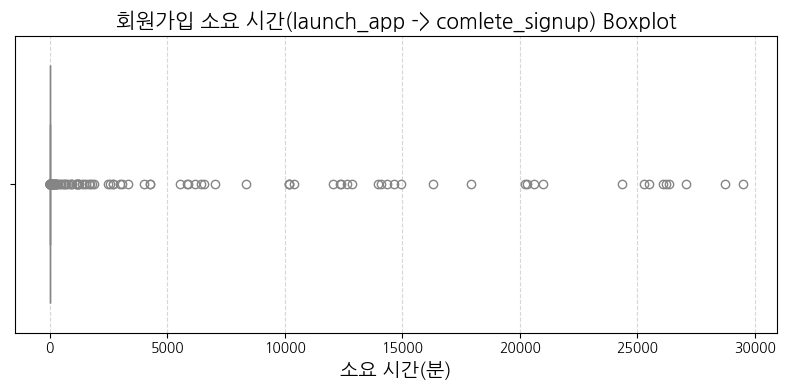

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=time_diffs, color="#ddd")
plt.xlabel("소요 시간(분)", fontsize=14)
plt.title("회원가입 소요 시간(launch_app -> comlete_signup) Boxplot", fontsize=15)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


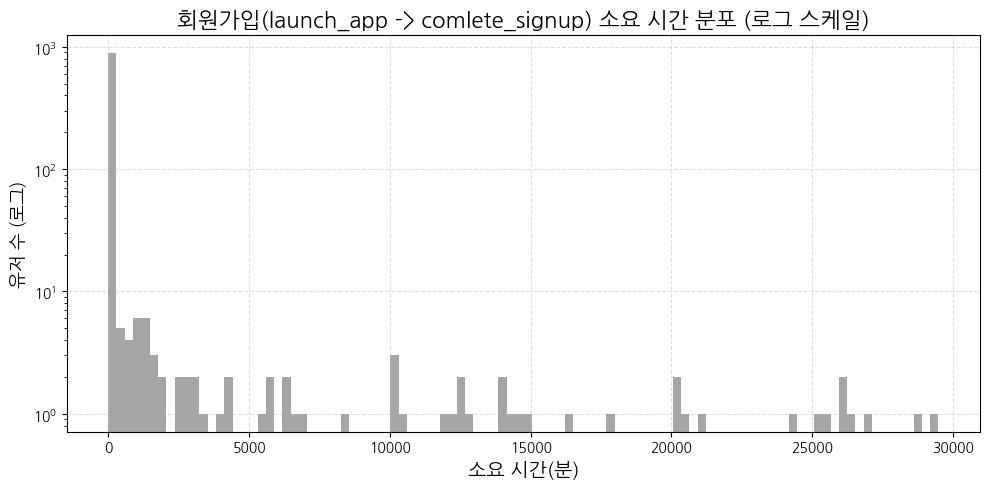

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(time_diffs, bins=100, color='gray', alpha=0.7)
plt.yscale('log')  # 긴 꼬리를 감안해 로그 스케일 사용
plt.xlabel("소요 시간(분)", fontsize=14)
plt.ylabel("유저 수 (로그)", fontsize=13)
plt.title("회원가입(launch_app -> comlete_signup) 소요 시간 분포 (로그 스케일)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


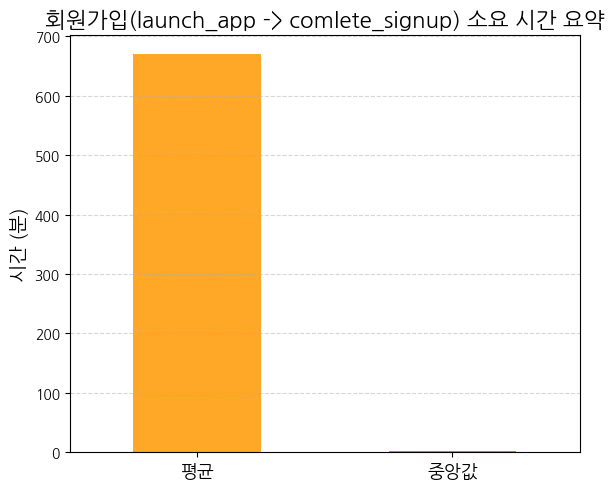

In [40]:
plt.figure(figsize=(6, 5))
metrics = pd.Series({
    '평균': time_diffs.mean(),
    '중앙값': time_diffs.median()
})
metrics.plot(kind='bar', color=['#ffa726', '#29b6f6'])

plt.title("회원가입(launch_app -> comlete_signup) 소요 시간 요약", fontsize=16)
plt.ylabel("시간 (분)", fontsize=14)
plt.xticks(rotation=0, fontsize=13)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" 이벤트가 있는 user_id 추출 (제외 대상 제외)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# 해당 user_id의 모든 이벤트 추출
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# 각 user_id별로 "view_signup" 이벤트가 존재하는지 확인
has_view_signup = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"이 있는 user_id 중 "view_signup"이 없는 user_id 개수
num_users_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" user 중 "view_signup"이 없는 user 수: {num_users_without_view_signup}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "view_signup"이 있었는지 확인
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 view_signup이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_users_all_events.groupby('user_id').apply(view_signup_before_signup)
num_users_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 없는 user 수: {num_users_without_view_signup_before}')
num_users_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 있는 user 수: {num_users_with_view_signup_before}')

"complete_signup" user 중 "view_signup"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 있는 user 수: 970


view_signup → complete_signup (2회 가입 유저 제외) 평균 소요 시간: 170.91분
view_signup → complete_signup (2회 가입 유저 제외) 중앙값 소요 시간: 1.51분


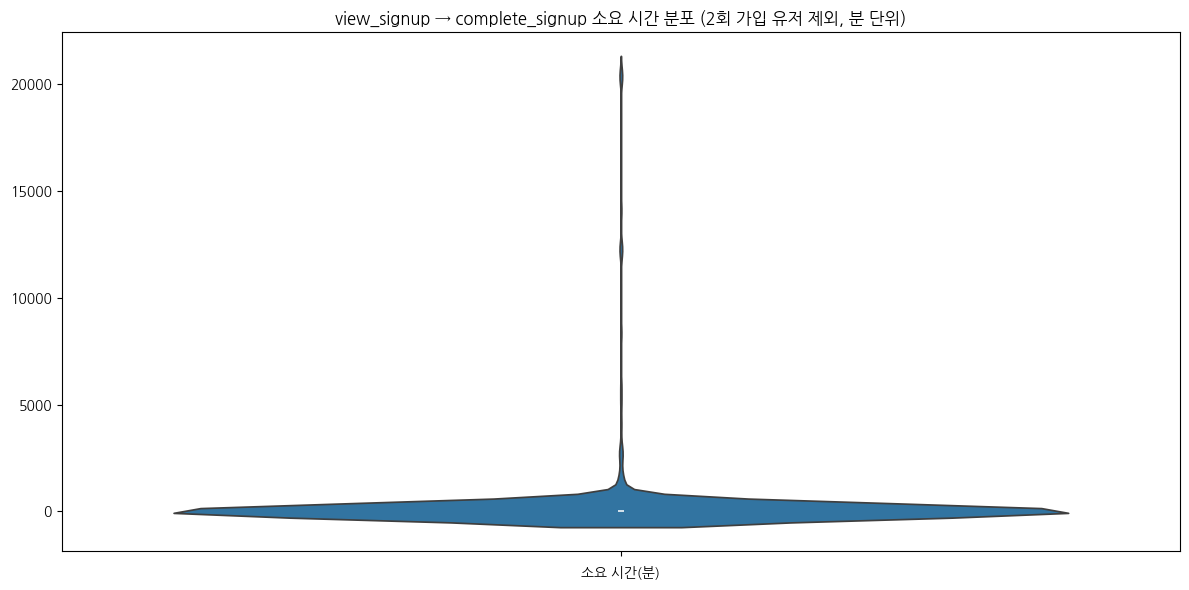

In [42]:
# 2번 회원가입한 유저 제외 (user_id: '1579289', '1579831')
exclude_user_ids = ['1579289', '1579831']

# 제외 대상이 아닌 user_id만 추출
filtered_user_ids = [uid for uid in signup_user_ids if uid not in exclude_user_ids]

# 해당 user_id의 모든 이벤트 추출
filtered_events = signup_users_all_events[signup_users_all_events['user_id'].isin(filtered_user_ids)].copy()

# user_id별로 view_signup과 complete_signup 시간 차이 계산
def get_view_signup_to_complete_signup_time(df):
    df_sorted = df.sort_values('event_datetime')
    view_signup_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    complete_signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if view_signup_times.empty or complete_signup_times.empty:
        return np.nan
    first_view_signup = view_signup_times.iloc[0]
    first_complete_signup = complete_signup_times.iloc[0]
    if first_view_signup < first_complete_signup:
        return (first_complete_signup - first_view_signup).total_seconds() / 60  # 분 단위
    else:
        return np.nan

filtered_time_diffs = (
    filtered_events.groupby('user_id')
    .apply(get_view_signup_to_complete_signup_time)
    .dropna()
)

mean_diff_2 = filtered_time_diffs.mean()
median_diff_2 = filtered_time_diffs.median()
print(f"view_signup → complete_signup (2회 가입 유저 제외) 평균 소요 시간: {mean_diff_2:.2f}분")
print(f"view_signup → complete_signup (2회 가입 유저 제외) 중앙값 소요 시간: {median_diff_2:.2f}분")

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (2회 가입 유저 제외, 분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

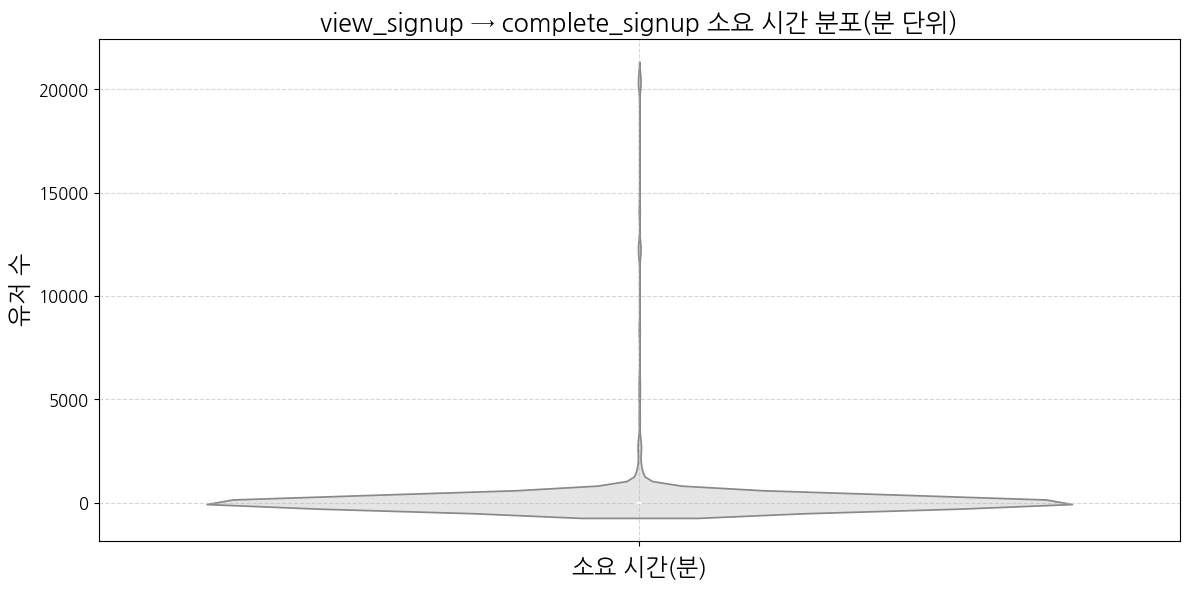

In [43]:
# view_signup → complete_signup 소요 시간 분포 (디자인/폰트/컬러 규격 적용)

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_time_diffs, color='#e5e5e5')
plt.title('view_signup → complete_signup 소요 시간 분포(분 단위)', fontsize=18)
plt.xlabel('소요 시간(분)', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

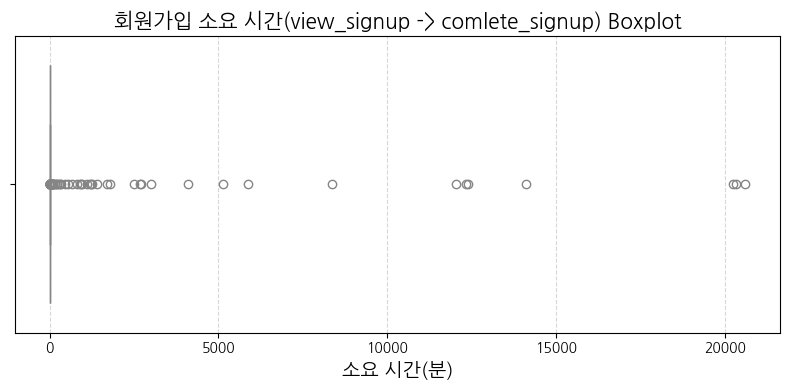

In [44]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=filtered_time_diffs, color="#ddd")
plt.xlabel("소요 시간(분)", fontsize=14)
plt.title("회원가입 소요 시간(view_signup -> comlete_signup) Boxplot", fontsize=15)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


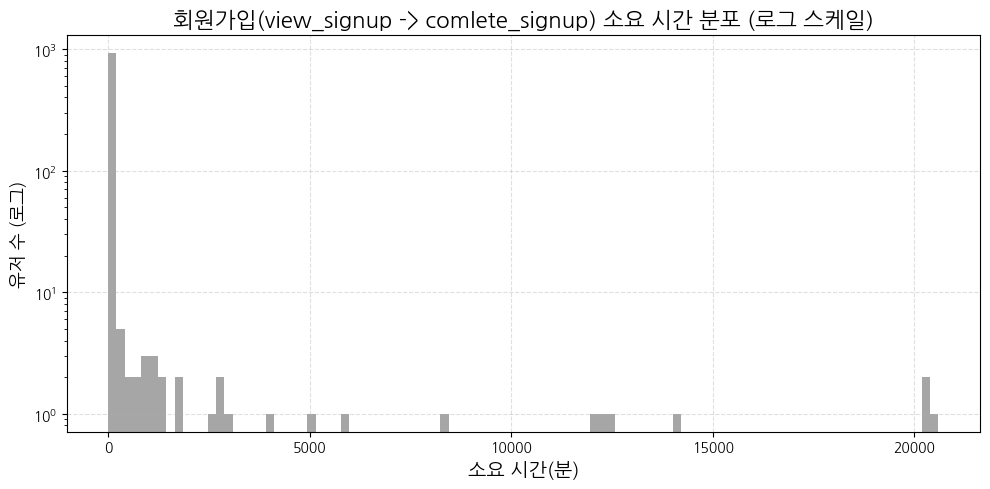

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(filtered_time_diffs, bins=100, color='gray', alpha=0.7)
plt.yscale('log')  # 긴 꼬리를 감안해 로그 스케일 사용
plt.xlabel("소요 시간(분)", fontsize=14)
plt.ylabel("유저 수 (로그)", fontsize=13)
plt.title("회원가입(view_signup -> comlete_signup) 소요 시간 분포 (로그 스케일)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


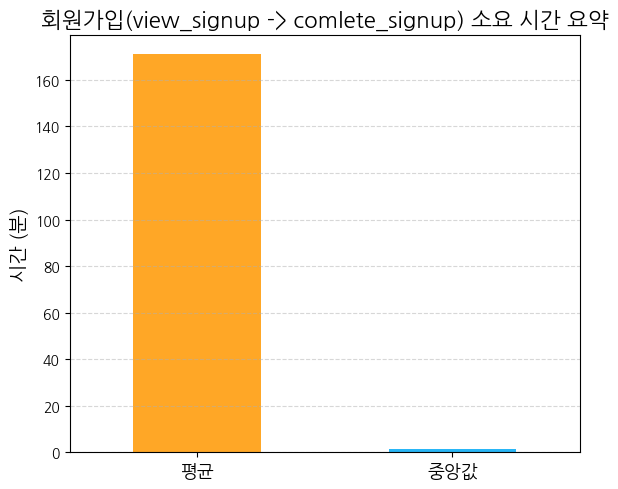

In [46]:
plt.figure(figsize=(6, 5))
metrics = pd.Series({
    '평균': filtered_time_diffs.mean(),
    '중앙값': filtered_time_diffs.median()
})
metrics.plot(kind='bar', color=['#ffa726', '#29b6f6'])

plt.title("회원가입(view_signup -> comlete_signup) 소요 시간 요약", fontsize=16)
plt.ylabel("시간 (분)", fontsize=14)
plt.xticks(rotation=0, fontsize=13)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

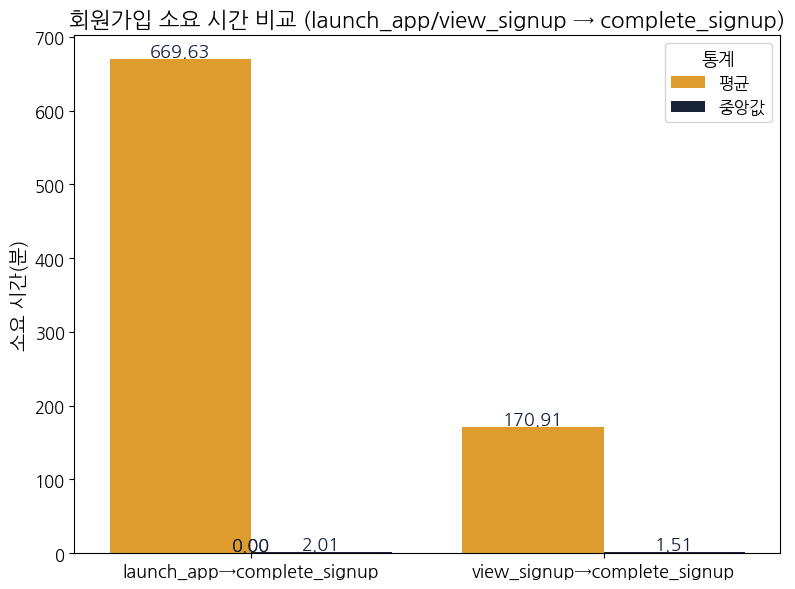

In [47]:
# 평균/중앙값 계산
launch_mean = time_diffs.mean()
launch_median = time_diffs.median()
view_mean = filtered_time_diffs.mean()
view_median = filtered_time_diffs.median()

# 데이터프레임 생성
compare_df = pd.DataFrame({
    '구간': ['launch_app→complete_signup', 'launch_app→complete_signup', 'view_signup→complete_signup', 'view_signup→complete_signup'],
    '통계': ['평균', '중앙값', '평균', '중앙값'],
    '소요시간(분)': [launch_mean, launch_median, view_mean, view_median]
})

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=compare_df,
    x='구간',
    y='소요시간(분)',
    hue='통계',
    palette=['#fca311', '#14213d']
)

# 각 바 위에 수치 표시
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=13, color='#14213d')

plt.title('회원가입 소요 시간 비교 (launch_app/view_signup → complete_signup)', fontsize=16)
plt.ylabel('소요 시간(분)', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.legend(title='통계', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

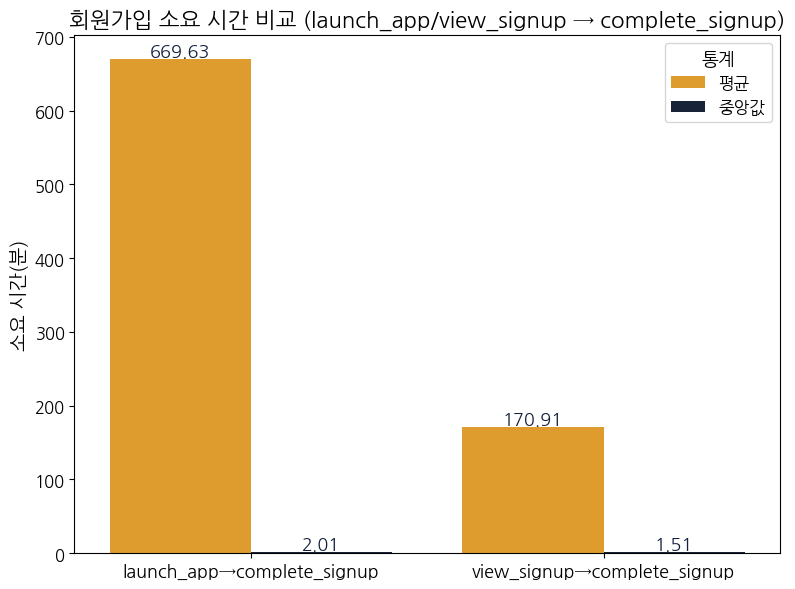

In [48]:
compare_df_nozero = compare_df.copy()
compare_df_nozero.loc[compare_df_nozero['소요시간(분)'] == 0, '소요시간(분)'] = np.nan

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=compare_df_nozero,
    x='구간',
    y='소요시간(분)',
    hue='통계',
    palette=['#fca311', '#14213d']
)

# 각 바 위에 수치 표시 (0.00은 표시하지 않음)
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=13, color='#14213d')

plt.title('회원가입 소요 시간 비교 (launch_app/view_signup → complete_signup)', fontsize=16)
plt.ylabel('소요 시간(분)', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.legend(title='통계', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

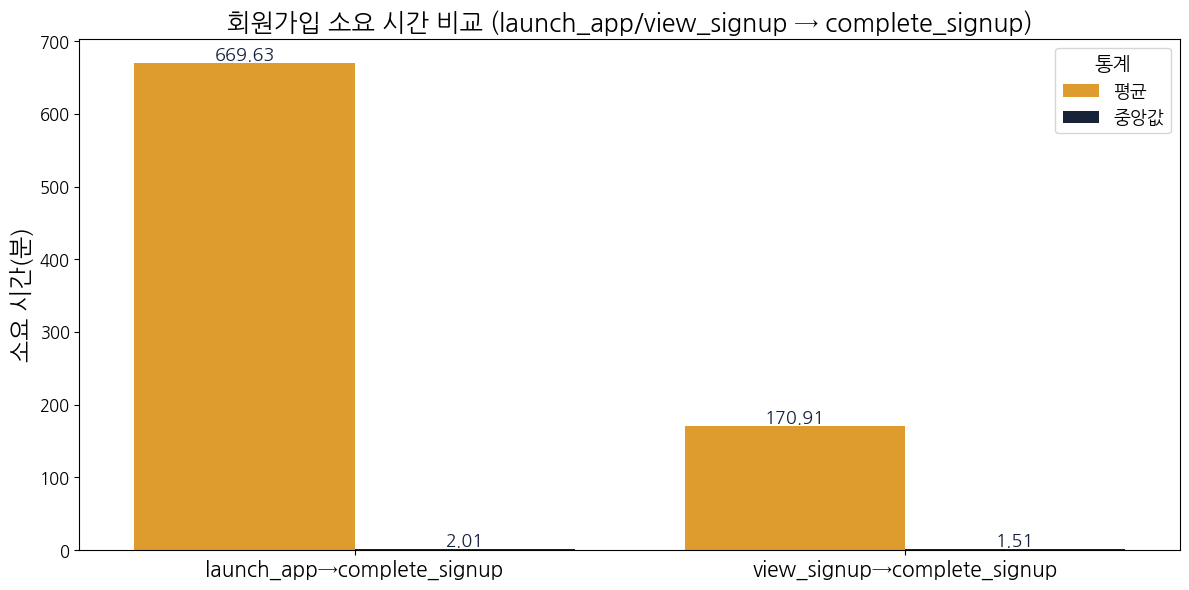

In [49]:
# 그래프 크기 및 글자 크기 템플릿 적용 (막대그래프)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=compare_df_nozero,
    x='구간',
    y='소요시간(분)',
    hue='통계',
    palette=['#fca311', '#14213d']
)

# 각 바 위에 수치 표시 (0.00은 표시하지 않음)
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=13, color='#14213d')

plt.title('회원가입 소요 시간 비교 (launch_app/view_signup → complete_signup)', fontsize=18)
plt.ylabel('소요 시간(분)', fontsize=17)
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title='통계', fontsize=13, title_fontsize=14)
plt.tight_layout()
plt.show()

세션으로 묶거나 user로 묶거나 크게 차이가 발생하진 않음     
-> 목적에 따라서 기준을 정할 듯함       
-> 특이 사항으로 2번 회원가입한 유저 및 값을 유추할 수 없는 경우 제외함     
    + 아직 그래프 색상 및 라벨 등의 크기를 변경하진 않음

✅ 1. launch_app → complete_signup 소요 시간 분포       
평균: 669.63분 (약 11시간 이상)     
중앙값: 2.01분

그래프 형태: Violin plot 중심부가 짧은 시간대(0~5분)에 밀집, 긴 꼬리가 오른쪽으로 매우 길게 분포 → 극단적인 outlier 존재

🔍 해석 및 인사이트     
대부분의 유저는 앱을 실행한 후 수 분 내에 회원가입을 완료하지만, 일부 유저는 수 시간에서 수일 단위로 소요되고 있음.     
중앙값이 2분인데 평균이 11시간 이상인 점으로 미루어 비정상적으로 지연된 가입 흐름이 존재.       

이는 실제 가입 완료가 매우 늦게 이루어진 유저, 혹은 앱을 여러 번 실행한 후 가입한 유저일 수 있음.       

✅ 2. view_signup → complete_signup 소요 시간 분포 (2회 가입 유저 제외)     
평균: 170.91분 (약 2.8시간)     
중앙값: 1.51분

그래프 형태: 위와 비슷하게 짧은 시간대에 집중, 다만 꼬리가 비교적 짧음

🔍 해석 및 인사이트     
실제 회원가입 UI를 접한 후 거의 바로 가입한 유저가 대부분 (1~2분 내 처리).      


| 구간                              | 평균 소요 시간    | 중앙값 소요 시간 | 분포 특징                            |
| ------------------------------- | ----------- | --------- | -------------------------------- |
| `launch_app → complete_signup`  | **669.63분** | **2.01분** | 전체 앱 진입부터 가입 완료까지의 실제 흐름. 극단값 존재 |
| `view_signup → complete_signup` | **170.91분** | **1.51분** | UI 진입 이후의 흐름. 더 집중되고 짧은 시간 분포    |


인사이트 및 해석
가입 전환 흐름의 정상성

1. launch_app → complete_signup은 전체 앱 진입부터 가입까지의 전체 여정을 반영하며, 중간 이벤트(view_signup)도 정상적으로 포함된 것으로 보입니다.

    - 단, 일부 유저의 지연 가입 (수시간~수일) 은 여전히 존재하며, 이는 실제 앱 재접속 또는 가입을 미룬 사례일 수 있습니다.

2. 지연 발생 해석
    - 특정 유저는 앱을 켠 직후 바로 가입하지 않고, 앱을 탐색하거나, 앱을 나갔다가 며칠 뒤에 다시 돌아와 가입하는 경우도 있습니다.

    - 이는 즉시가입/지연가입 유저 구분에 의미를 부여하는 근거가 되며, 실제 리텐션에 영향을 미치는 요소로 작용할 수 있습니다.

3. UI 개선 포인트는 여전히 유효

    - launch_app → view_signup 구간을 전환율 관점에서 모니터링하면, 홈 화면이나 랜딩 화면에서 가입 유도 요소(CTA)가 약하거나, 일부 유저는 가입 페이지까지 진입하지 못하고 이탈했을 가능성도 배제할 수 없습니다.

4. view_signup → complete_signup은 가입 의사 표현 이후 전환 구간
    - 이 구간은 가입 페이지에 진입한 후 실제로 가입까지 이르는 구간이므로, 퍼널 효율성 개선 지표로 적합합니다.

### 즉시 가입 유저와 지연 가입 유저에 대해서
---

In [50]:
# launch_app → complete_signup 시간 계산된 데이터에서 분리
launch_signup_diffs = (
    filtered_signup_users_events.groupby('user_id')
    .apply(get_launch_signup_time_diff)  # 같은 방식으로 작성된 함수
    .dropna()
)

# 즉시 가입 유저 기준 분리
instant_threshold = 2.01 # 위 launch_app -> complete_signup 소요 시간의 중앙값
instant_user_ids = launch_signup_diffs[launch_signup_diffs <= instant_threshold].index
delayed_user_ids = launch_signup_diffs[launch_signup_diffs > instant_threshold].index

# 1) 회원가입 시점 추출
signup_times = filtered_signup_users_events[filtered_signup_users_events['event_key'] == 'complete_signup']
signup_times = signup_times.groupby('user_id')['event_datetime'].min()

# 2) 이후 발생한 이벤트 중 첫 번째 시점 (가입 이후만!)
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

# complete_signup 이후 이벤트만 남기기
after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[after_signup_events['event_datetime'] > after_signup_events['signup_time']]

# 이후 이벤트 중 가장 빠른 시점만 추출
next_event_times = after_signup_events.groupby("user_id")['event_datetime'].min()

# gap 계산 및 리텐션 플래그 다시 생성
activity_gap_days = (next_event_times - signup_times).dt.total_seconds() / (60 * 60 * 24)

retention_flags = pd.DataFrame({
    'retained_1d': activity_gap_days <= 1,
    'retained_3d': activity_gap_days <= 3,
    'retained_7d': activity_gap_days <= 7,
    'retained_30d': activity_gap_days <= 30
})

In [51]:
# 그룹 태깅
retention_flags['user_id'] = retention_flags.index
retention_flags['signup_speed'] = retention_flags['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else ('delayed' if x in delayed_user_ids else 'unknown')
)

# instant 또는 delayed만 필터링
retention_filtered = retention_flags[retention_flags['signup_speed'].isin(['instant', 'delayed'])]

# 그룹별 평균 = 리텐션율 (True 비율)
retention_summary = (
    retention_filtered
    .groupby('signup_speed')[['retained_1d', 'retained_3d', 'retained_7d', 'retained_30d']]
    .mean()
    .reset_index()
)
retention_summary

,signup_speed,retained_1d,retained_3d,retained_7d,retained_30d
0,delayed,0.958678,0.960744,0.960744,0.960744
1,instant,0.952479,0.952479,0.952479,0.958678


In [52]:
# 'complete_question' 이벤트가 user별로 몇 번 발생했는지 집계
question_complete_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_question'].groupby('user_id').size()

# 평균 질문 완료 횟수 계산
mean_complete_questions = question_complete_counts.mean()
print(f"유저별 평균 질문 완료 횟수: {mean_complete_questions:.2f}")

유저별 평균 질문 완료 횟수: 3.11


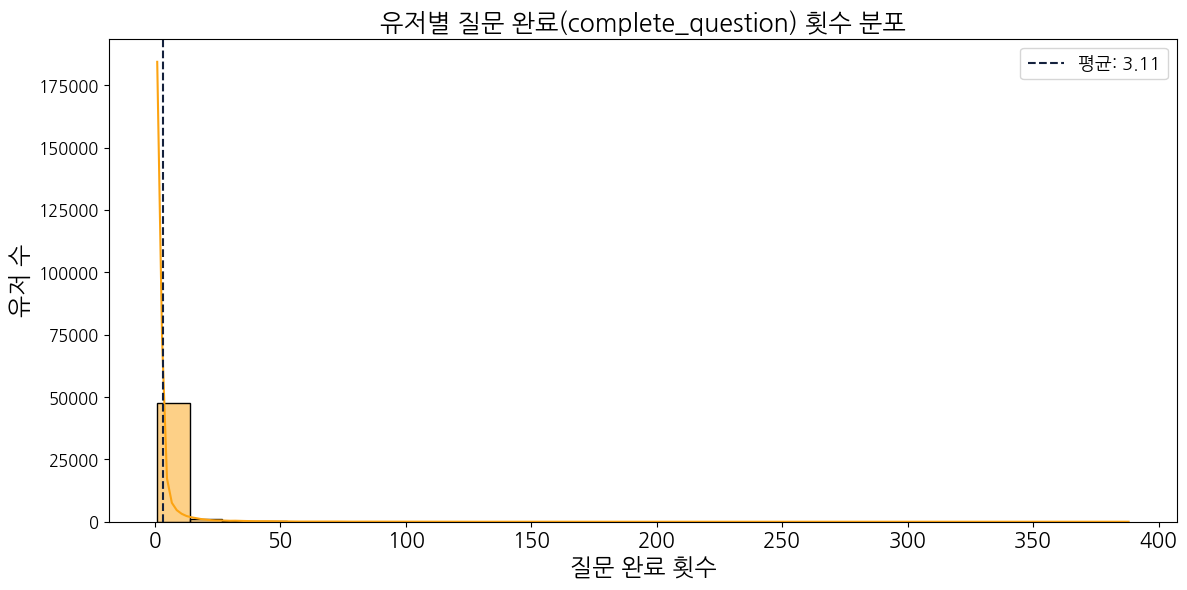

In [53]:
# 유저별 complete_question 이벤트 횟수 집계
question_complete_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_question'].groupby('user_id').size()
mean_complete_questions = question_complete_counts.mean()

plt.figure(figsize=(12, 6))
sns.histplot(question_complete_counts, bins=30, kde=True, color='#fca311')
plt.axvline(mean_complete_questions, color='#14213d', linestyle='--', label=f'평균: {mean_complete_questions:.2f}')
plt.title('유저별 질문 완료(complete_question) 횟수 분포', fontsize=18)
plt.xlabel('질문 완료 횟수', fontsize=17)
plt.ylabel('유저 수', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

리텐션율이 비정상적으로 높기 때문에 기준 강화(질문 3회 완료)        
- 질문 3회 완료인 이유는?
    - 유저별 평균 질문 완료 횟수가 3.11로 3번은 완료한 유저들이 다수이기 때문에

In [54]:
# complete_signup 이후 이벤트만 추출
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[
    after_signup_events['event_datetime'] > after_signup_events['signup_time']
]

# complete_question 이벤트만 필터링 후 개수 세기
question_counts = after_signup_events[
    after_signup_events['event_key'] == 'complete_question'
].groupby('user_id').size()

# 리텐션 조건: 3회 이상
retained_users = question_counts[question_counts >= 3].index

# retention_flags 다시 구성
retention_flags = pd.DataFrame({
    'user_id': signup_times.index,
    'retained_custom': signup_times.index.isin(retained_users)
})

In [55]:
# 가입 속도 태깅
retention_flags['signup_speed'] = retention_flags['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else ('delayed' if x in delayed_user_ids else 'unknown')
)

# 필터링
retention_filtered = retention_flags[retention_flags['signup_speed'].isin(['instant', 'delayed'])]

# 그룹별 리텐션율 계산
retention_summary = (
    retention_filtered
    .groupby('signup_speed')['retained_custom']
    .mean()
    .reset_index()
    .rename(columns={'retained_custom': 'retention_rate'})
)

retention_summary

,signup_speed,retention_rate
0,delayed,0.291322
1,instant,0.241736


위 리텐션(조건 질문 3회 완료)을 1,3,7일 기간으로 나누어서 확인했을 때

In [56]:
# 가입 시점 (user_id별 complete_signup 시간)
signup_times = filtered_signup_users_events[filtered_signup_users_events['event_key'] == 'complete_signup']
signup_times = signup_times.groupby('user_id')['event_datetime'].min()

# 가입 이후의 이벤트 (complete_signup 제외)
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[
    after_signup_events['event_datetime'] > after_signup_events['signup_time']
]


In [57]:
# 기준일 계산
after_signup_events['days_after_signup'] = (
    (after_signup_events['event_datetime'] - after_signup_events['signup_time']).dt.total_seconds() / (60 * 60 * 24)
)

# 리텐션 조건 함수
def get_retained_users(days):
    filtered = after_signup_events[
        (after_signup_events['event_key'] == 'complete_question') &
        (after_signup_events['days_after_signup'] <= days)
    ]
    counts = filtered.groupby('user_id').size()
    retained = counts[counts >= 2].index
    return retained


In [58]:
retention_flags = pd.DataFrame({'user_id': signup_times.index})
retention_flags['retained_1d'] = retention_flags['user_id'].isin(get_retained_users(1))
retention_flags['retained_3d'] = retention_flags['user_id'].isin(get_retained_users(3))
retention_flags['retained_7d'] = retention_flags['user_id'].isin(get_retained_users(7))

# 가입 속도 태깅
retention_flags['signup_speed'] = retention_flags['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else ('delayed' if x in delayed_user_ids else 'unknown')
)

# 필터링
retention_filtered = retention_flags[retention_flags['signup_speed'].isin(['instant', 'delayed'])]

# 요약
retention_summary = (
    retention_filtered
    .groupby('signup_speed')[['retained_1d', 'retained_3d', 'retained_7d']]
    .mean()
    .reset_index()
)

retention_summary

,signup_speed,retained_1d,retained_3d,retained_7d
0,delayed,0.266529,0.307851,0.334711
1,instant,0.208678,0.262397,0.280992


In [59]:
from scipy.stats import mannwhitneyu

for day in ['retained_1d', 'retained_3d', 'retained_7d']:
    instant_values = retention_filtered[retention_filtered['signup_speed'] == 'instant'][day].astype(int)
    delayed_values = retention_filtered[retention_filtered['signup_speed'] == 'delayed'][day].astype(int)
    
    stat, p = mannwhitneyu(instant_values, delayed_values, alternative='two-sided')
    print(f"{day} - Mann–Whitney U 검정 p-value: {p:.5f}")


retained_1d - Mann–Whitney U 검정 p-value: 0.03458
retained_3d - Mann–Whitney U 검정 p-value: 0.11752
retained_7d - Mann–Whitney U 검정 p-value: 0.07041


| 리텐션 기준     | p-value     | 유의수준(α=0.05) 기준 해석      |
| ---------- | ----------- | ----------------------- |
| **1일 리텐션** | **0.03458** | ✅ 유의미한 차이 있음            |
| **3일 리텐션** | 0.11752     | ❌ 유의미한 차이 없음            |
| **7일 리텐션** | 0.07041     | ❌ 유의미한 차이 없음 (경계선에 가까움) |


해석 :      
1일 리텐션의 경우, 즉시 가입 유저와 지연 가입 유저 간에 유의미한 차이가 있습니다.       
→ 두 그룹의 **초기 적응률(첫날 복귀율)**은 통계적으로 다르다는 것을 의미합니다.

3일 및 7일 리텐션은 p-value가 0.05보다 크므로 유의미한 차이 없음으로 판단합니다.        
→ 시간이 지남에 따라 두 그룹 간 리텐션 차이가 줄어들거나 의미 없게 됨을 시사합니다.

📌 인사이트
즉시 가입 vs 지연 가입 유저는 초기 하루 안에는 리텐션에서 차이를 보임
예: 앱 실행 직후 바로 가입한 유저들은 의사결정이 빠르지만, 반대로 정착률은 낮을 수 있음.
반면 약간 고민하고 가입한 유저가 조금 더 오래 머무는 경향을 가질 수 있음.

하지만 3일, 7일 이상 지나면 리텐션 차이는 거의 없어짐       
결국 핵심은 "가입 후 첫 24시간 안에 이 유저가 다시 돌아오는가?"가 중요 포인트임을 의미      

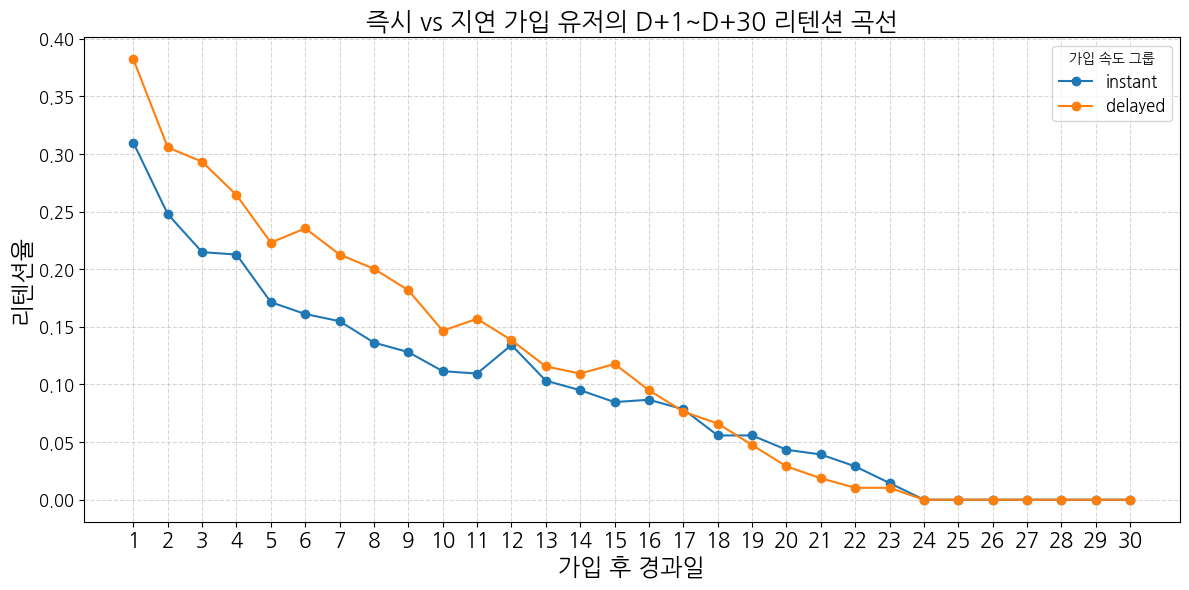

In [60]:
# 두 그룹의 리텐션 곡선
# 각 유저별 가입 시간
signup_time_df = filtered_signup_users_events[filtered_signup_users_events['event_key'] == 'complete_signup'] \
    .groupby('user_id')['event_datetime'].min().rename('signup_time')

# 전체 이벤트 로그 중 가입 이후 이벤트만 추출
after_signup = filtered_signup_users_events[filtered_signup_users_events['event_key'] != 'complete_signup'].copy()
after_signup = after_signup.merge(signup_time_df, left_on='user_id', right_index=True)
after_signup = after_signup[after_signup['event_datetime'] > after_signup['signup_time']]
after_signup['days_after_signup'] = (after_signup['event_datetime'] - after_signup['signup_time']).dt.days

# signup_speed 정보 붙이기
signup_speed_df = pd.DataFrame({'user_id': list(instant_user_ids) + list(delayed_user_ids)})
signup_speed_df['signup_speed'] = signup_speed_df['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else 'delayed'
)

after_signup = after_signup.merge(signup_speed_df, on='user_id')

# D+1 ~ D+30 리텐션율 계산
retention_curve = (
    after_signup.groupby(['signup_speed', 'days_after_signup'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'retained_users'})
)

# 각 그룹별 가입 유저 수
signup_counts = signup_speed_df.groupby('signup_speed')['user_id'].nunique().to_dict()
retention_curve['total_users'] = retention_curve['signup_speed'].map(signup_counts)
retention_curve['retention_rate'] = retention_curve['retained_users'] / retention_curve['total_users']

# 0~30일까지 누락된 날짜 보완
all_days = pd.DataFrame({'days_after_signup': range(1, 31)})
final_curve = pd.concat([
    all_days.merge(
        retention_curve[retention_curve['signup_speed'] == group],
        on='days_after_signup',
        how='left'
    ).assign(signup_speed=group)
    for group in ['instant', 'delayed']
])
final_curve['retention_rate'] = final_curve['retention_rate'].fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
for group in ['instant', 'delayed']:
    subset = final_curve[final_curve['signup_speed'] == group]
    plt.plot(subset['days_after_signup'], subset['retention_rate'], label=group, marker='o')

plt.title("즉시 vs 지연 가입 유저의 D+1~D+30 리텐션 곡선", fontsize=18)
plt.xlabel("가입 후 경과일", fontsize=17)
plt.ylabel("리텐션율", fontsize=17)
plt.xticks(range(1, 31), fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='가입 속도 그룹', fontsize=12)
plt.tight_layout()
plt.show()

In [61]:
signup_times = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] == 'complete_signup'
].groupby('user_id')['event_datetime'].min()

# 가입 후 이벤트 (complete_signup 제외)
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[
    after_signup_events['event_datetime'] > after_signup_events['signup_time']
]

# 가입 후 경과일
after_signup_events['days_after_signup'] = (
    (after_signup_events['event_datetime'] - after_signup_events['signup_time']).dt.days + 1
)

# 기준 유저 집합 분리
instant_users = set(retention_flags.query("signup_speed == 'instant'")['user_id'])
delayed_users = set(retention_flags.query("signup_speed == 'delayed'")['user_id'])

# 함수: 특정 유저군에 대해 day별 리텐션율 계산
def compute_daily_retention(user_ids, max_days=30):
    retention_rates = []
    base_users = set(user_ids)
    signup_base = len(base_users)

    for day in range(1, max_days + 1):
        retained_users = after_signup_events[
            (after_signup_events['user_id'].isin(base_users)) &
            (after_signup_events['days_after_signup'] == day)
        ]['user_id'].unique()
        retention_rate = len(set(retained_users)) / signup_base
        retention_rates.append(retention_rate)
    
    return retention_rates

# 계산
instant_retention_rates = compute_daily_retention(instant_users)
delayed_retention_rates = compute_daily_retention(delayed_users)

In [62]:
# x축: 날짜
days = np.arange(1, 31)

# y축: 리텐션율 (D+1 ~ D+30)
instant_curve = np.array(instant_retention_rates)  # 즉시 가입 그룹 리텐션률 리스트
delayed_curve = np.array(delayed_retention_rates)  # 지연 가입 그룹 리텐션률 리스트

# AUC 계산
instant_auc = auc(days, instant_curve)
delayed_auc = auc(days, delayed_curve)

print(f"즉시 가입 AUC: {instant_auc:.4f}")
print(f"지연 가입 AUC: {delayed_auc:.4f}")


즉시 가입 AUC: 3.2552
지연 가입 AUC: 3.9174


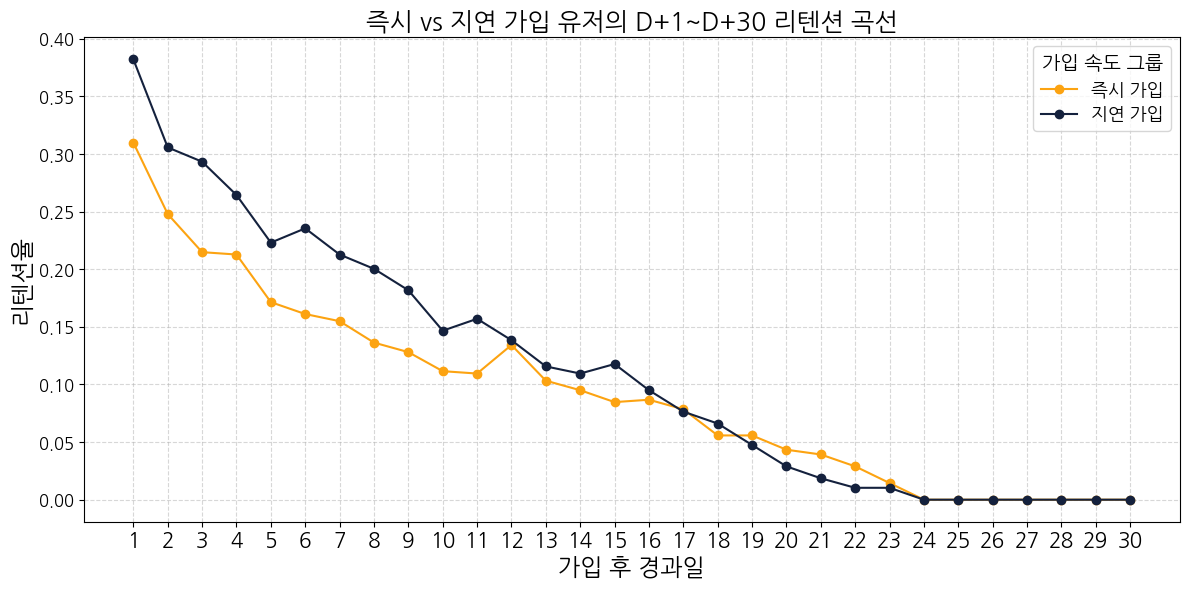

In [63]:
# 즉시 vs 지연 가입 유저의 D+1~D+30 리텐션 곡선 (디자인/폰트/컬러 규격 적용)

plt.figure(figsize=(12, 6))
colors = {'instant': '#fca311', 'delayed': '#14213d'}

for group in ['instant', 'delayed']:
    subset = final_curve[final_curve['signup_speed'] == group]
    plt.plot(
        subset['days_after_signup'],
        subset['retention_rate'],
        label='즉시 가입' if group == 'instant' else '지연 가입',
        marker='o',
        color=colors[group]
    )

plt.title("즉시 vs 지연 가입 유저의 D+1~D+30 리텐션 곡선", fontsize=18)
plt.xlabel("가입 후 경과일", fontsize=17)
plt.ylabel("리텐션율", fontsize=17)
plt.xticks(range(1, 31), fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='가입 속도 그룹', fontsize=13, title_fontsize=14)
plt.tight_layout()
plt.show()

지연 가입 유저는 전반적으로 리텐션 곡선에서 높은 유지율을 보였으며, AUC 기준으로도 더 큰 누적 리텐션 값을 나타냈습니다. 다만, D+17~D+23 구간에서 즉시 가입 유저가 소폭 더 높은 리텐션을 보인 구간도 존재하며, 이는 특정 시점 이후 반응이 다른 유저군이 섞여 있을 가능성을 시사합니다. 따라서 가입 속도 외에도 중장기 리텐션에 영향을 주는 다른 요인을 탐색할 필요가 있습니다.

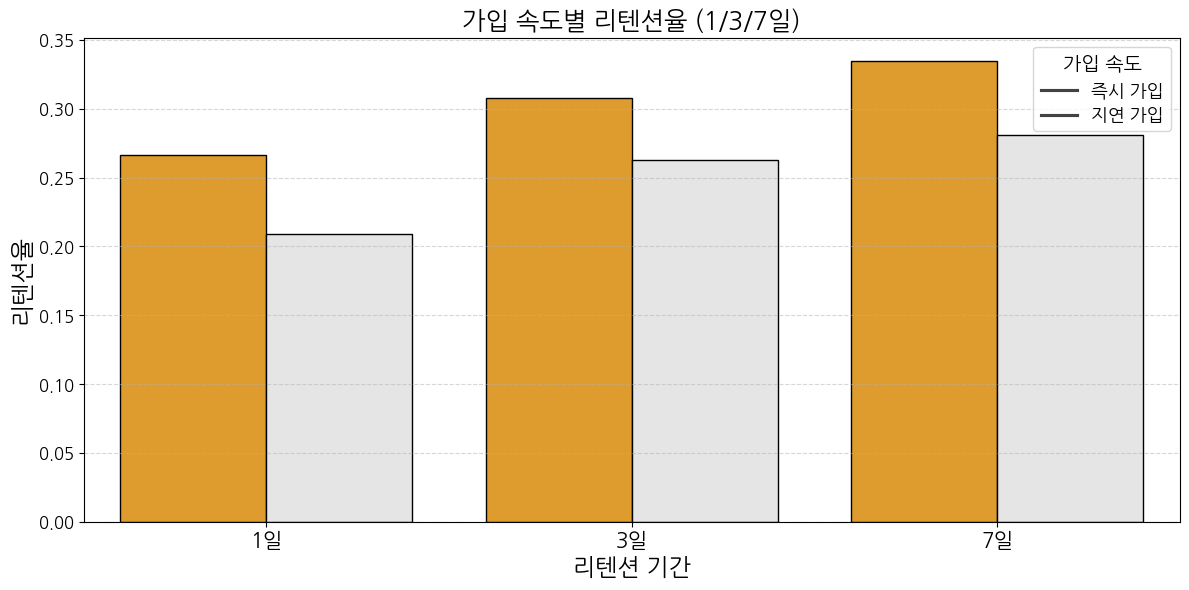

In [64]:
# retention_summary 시각화 (디자인/폰트/컬러 규격 적용)

# 컬러 템플릿
base_color = '#e5e5e5'
highlight_color = '#fca311'
bar_colors = [highlight_color if x == 'instant' else base_color for x in retention_summary['signup_speed']]

# melt for grouped barplot
retention_melted = retention_summary.melt(id_vars='signup_speed', 
                                          value_vars=['retained_1d', 'retained_3d', 'retained_7d'],
                                          var_name='period', value_name='retention_rate')

# period 한글 라벨
period_labels = {
    'retained_1d': '1일',
    'retained_3d': '3일',
    'retained_7d': '7일'
}
retention_melted['period'] = retention_melted['period'].map(period_labels)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=retention_melted,
    x='period',
    y='retention_rate',
    hue='signup_speed',
    palette=[highlight_color, base_color],
    edgecolor='black'
)
plt.title('가입 속도별 리텐션율 (1/3/7일)', fontsize=18)
plt.xlabel('리텐션 기간', fontsize=17)
plt.ylabel('리텐션율', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title='가입 속도', labels=['즉시 가입', '지연 가입'], fontsize=13, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

### 회원 가입 시도 후 이탈 유저
---

In [65]:
# step1: launch_app 한 유저 수
launch_app_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'launch_app', 'user_id'
].unique()

# step2: view_signup 시도한 유저 수
view_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'view_signup', 'user_id'
].unique()

# step3: complete_signup 완료한 유저 수
complete_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'complete_signup', 'user_id'
].unique()

# 중간값들
view_to_complete_users = np.intersect1d(view_signup_users, complete_signup_users)
launch_to_view_users = np.intersect1d(launch_app_users, view_signup_users)
launch_to_complete_users = np.intersect1d(launch_app_users, complete_signup_users)

# 이탈 유저
only_view_signup_users = set(view_signup_users) - set(complete_signup_users)
only_launch_app_users = set(launch_app_users) - set(view_signup_users)

# 퍼널 요약
print(f"launch_app → view_signup 전환률: {len(launch_to_view_users) / len(launch_app_users):.2%}")
print(f"view_signup → complete_signup 전환률: {len(view_to_complete_users) / len(view_signup_users):.2%}")
print(f"launch_app → complete_signup 전체 전환률: {len(launch_to_complete_users) / len(launch_app_users):.2%}")


launch_app → view_signup 전환률: 2.78%
view_signup → complete_signup 전환률: 14.59%
launch_app → complete_signup 전체 전환률: 0.41%


In [66]:
# 유저별 launch_app 평균 발생 수
launch_app_counts = signup_users_all_events[signup_users_all_events['event_key'] == 'launch_app'].groupby('user_id').size()
mean_launch_app_per_user = launch_app_counts.mean()
print(f"유저별 launch_app 평균 발생 수: {mean_launch_app_per_user:.2f}")

# 유저별 launch_app 직후 발생한 이벤트 집계
# 1. 정렬
events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])

# 2. launch_app 인덱스 찾기
launch_app_idx = events_sorted[events_sorted['event_key'] == 'launch_app'].index

# 3. 각 launch_app의 다음 이벤트 인덱스
next_event_idx = launch_app_idx + 1
# next_event_idx가 데이터프레임 범위 내에 있는지 확인
next_event_idx = next_event_idx[next_event_idx < len(events_sorted)]

# 4. launch_app 직후 이벤트 추출
next_events = events_sorted.iloc[next_event_idx]
next_event_counts = next_events['event_key'].value_counts()
print("유저별 launch_app 직후 발생한 이벤트별 빈도:")
print(next_event_counts)

유저별 launch_app 평균 발생 수: 15.30
유저별 launch_app 직후 발생한 이벤트별 빈도:
event_key
view_timeline_tap                    122
launch_app                           101
click_question_open                  101
view_lab_tap                          82
click_bottom_navigation_questions     71
$session_start                        64
skip_question                         64
$session_end                          53
click_bottom_navigation_profile       51
click_bottom_navigation_timeline      49
view_questions_tap                    40
complete_question                     34
view_profile_tap                      32
view_signup                           31
click_question_start                  31
click_bottom_navigation_lab           21
click_appbar_chat_rooms               20
click_notice_detail                   19
click_appbar_alarm_center             15
click_attendance                      14
click_question_share                  13
click_question_ask                    11
click_friend_invite        

In [67]:
# 회원가입(complete_signup) 이후 launch_app이 발생한 유저 비율 계산

# 1. user_id별 complete_signup(가입) 시각 추출
signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 2. 가입 이후 launch_app 발생 여부 체크
def has_launch_app_after_signup(df):
    uid = df['user_id'].iloc[0]
    last_signup = signup_time.get(uid, pd.NaT)
    if pd.isna(last_signup):
        return False
    # 가입 이후 launch_app 발생 여부
    return ((df['event_key'] == 'launch_app') & (df['event_datetime'] > last_signup)).any()

launch_app_after_signup = (
    signup_users_all_events
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .apply(has_launch_app_after_signup)
)

# 3. 비율 및 개수 출력
num_users_with_launch_app_after_signup = launch_app_after_signup.sum()
total_signup_users = len(signup_time)
ratio = num_users_with_launch_app_after_signup / total_signup_users

print(f"회원가입 이후 launch_app 발생 유저 수: {num_users_with_launch_app_after_signup} / {total_signup_users} ({ratio:.2%})")

회원가입 이후 launch_app 발생 유저 수: 656 / 970 (67.63%)


launch_app이 반드시 회원가입 이전에만 나타나는 이벤트는 아니기 때문에 launch_app -> view_signu p 사이 이탈률을 보기에는 무리가 있다고 판단됨

In [68]:
# 1. view_signup → complete_signup 유저 추출
view_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'view_signup', 'user_id'
].unique()

complete_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'complete_signup', 'user_id'
].unique()

# 2. 전환된 유저
converted_users = np.intersect1d(view_signup_users, complete_signup_users)

# 3. 전환률 계산
total_view = len(view_signup_users)
converted = len(converted_users)
conversion_rate = converted / total_view if total_view > 0 else 0

print(f"view_signup 유저 수: {total_view}")
print(f"complete_signup으로 전환된 유저 수: {converted}")
print(f"전환률: {conversion_rate:.2%}")


view_signup 유저 수: 6664
complete_signup으로 전환된 유저 수: 972
전환률: 14.59%


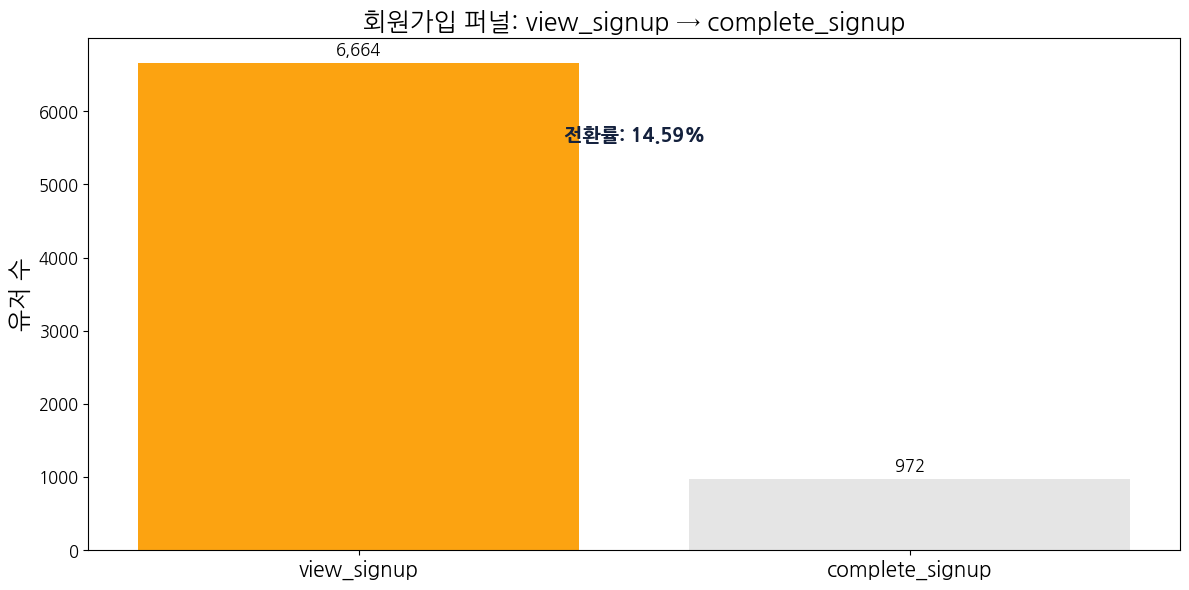

In [69]:
# 데이터 정의
labels = ['view_signup', 'complete_signup']
values = [total_view, converted]
colors = ['#fca311', '#e5e5e5']  # 강조 색상 + 기본색상

# 그래프 사이즈
plt.figure(figsize=(12, 6))

# 막대그래프
bars = plt.bar(labels, values, color=colors)

# 제목
plt.title('회원가입 퍼널: view_signup → complete_signup', fontsize=18)

# y축 라벨
plt.ylabel('유저 수', fontsize=17)

# 축 폰트 크기
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

# 막대 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + total_view * 0.01, f'{int(yval):,}', 
             ha='center', va='bottom', fontsize=12)

# 전환률 텍스트 중앙 표시
plt.text(0.5, max(values) * 0.85, f'전환률: {conversion_rate:.2%}', 
         ha='center', va='center', fontsize=14, color='#14213d', fontweight='bold')

# 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [70]:
# view_signup → complete_signup 전환 유저(=converted_users)에 대해 추가로 살펴볼 수 있는 분석 아이디어

# 1. 전환 유저 vs 미전환 유저 비교
#   - 성별, 가입 요일, 친구 수, 첫 행동 등 차이
converted_set = set(converted_users)
not_converted_set = set(view_signup_users) - converted_set

# user_df에서 성별/요일/친구수 비교
converted_info = user_df[user_df['id'].astype(str).isin(converted_set)]
not_converted_info = user_df[user_df['id'].astype(str).isin(not_converted_set)]

print("전환 유저 성별 분포:")
print(converted_info['gender'].value_counts())
print("\n미전환 유저 성별 분포:")
print(not_converted_info['gender'].value_counts())

print("\n전환 유저 가입 요일 분포:")
print(converted_info['signup_dayofweek_kor'].value_counts())
print("\n미전환 유저 가입 요일 분포:")
print(not_converted_info['signup_dayofweek_kor'].value_counts())


전환 유저 성별 분포:
gender
F    437
M    406
Name: count, dtype: int64

미전환 유저 성별 분포:
gender
F    3333
M    1994
Name: count, dtype: int64

전환 유저 가입 요일 분포:
signup_dayofweek_kor
화요일    180
수요일    136
목요일    123
토요일    110
금요일    107
월요일     97
일요일     90
Name: count, dtype: int64

미전환 유저 가입 요일 분포:
signup_dayofweek_kor
일요일    966
토요일    897
화요일    797
월요일    769
수요일    737
금요일    584
목요일    577
Name: count, dtype: int64


In [71]:
# 전환 유저의 첫 행동(complete_signup 이후) 분석 (IndexError 방지)
def get_first_action_after_signup(df):
    if (df['event_key'] == 'complete_signup').any():
        signup_time = df[df['event_key'] == 'complete_signup']['event_datetime'].min()
        after_signup = df[df['event_datetime'] > signup_time]['event_key']
        if not after_signup.empty:
            return after_signup.iloc[0]
        else:
            return None
    else:
        return None

first_actions = (
    signup_users_all_events[signup_users_all_events['user_id'].isin(converted_users)]
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .apply(get_first_action_after_signup)
    .value_counts()
)

print("\n전환 유저의 회원가입 후 첫 행동 Top 10:")
print(first_actions.head(10))


전환 유저의 회원가입 후 첫 행동 Top 10:
view_timeline_tap                    218
click_question_start                 164
click_bottom_navigation_questions     96
click_bottom_navigation_timeline      86
view_lab_tap                          82
click_bottom_navigation_profile       61
launch_app                            51
click_bottom_navigation_lab           28
$session_end                          25
click_question_ask                    22
Name: count, dtype: int64


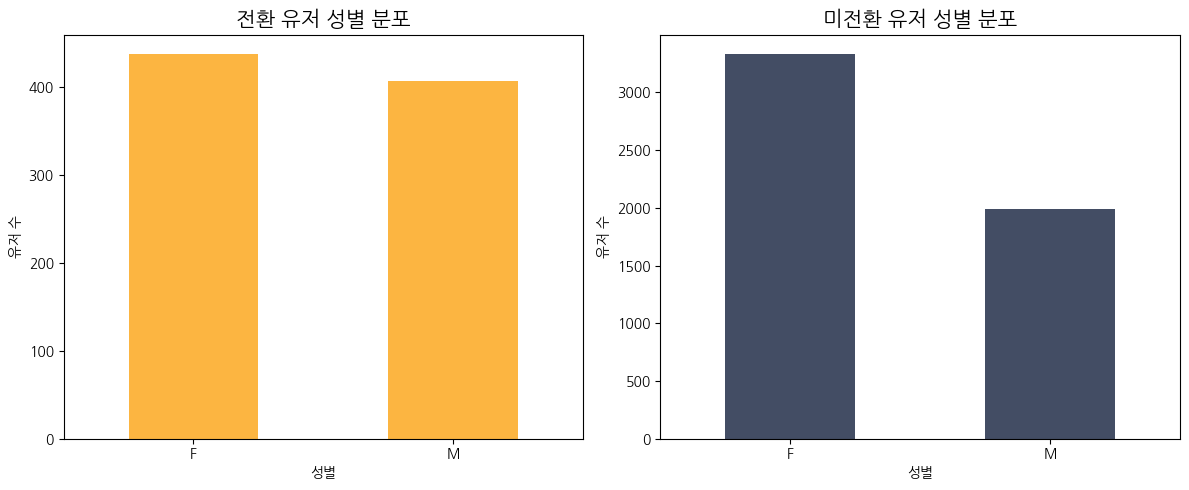

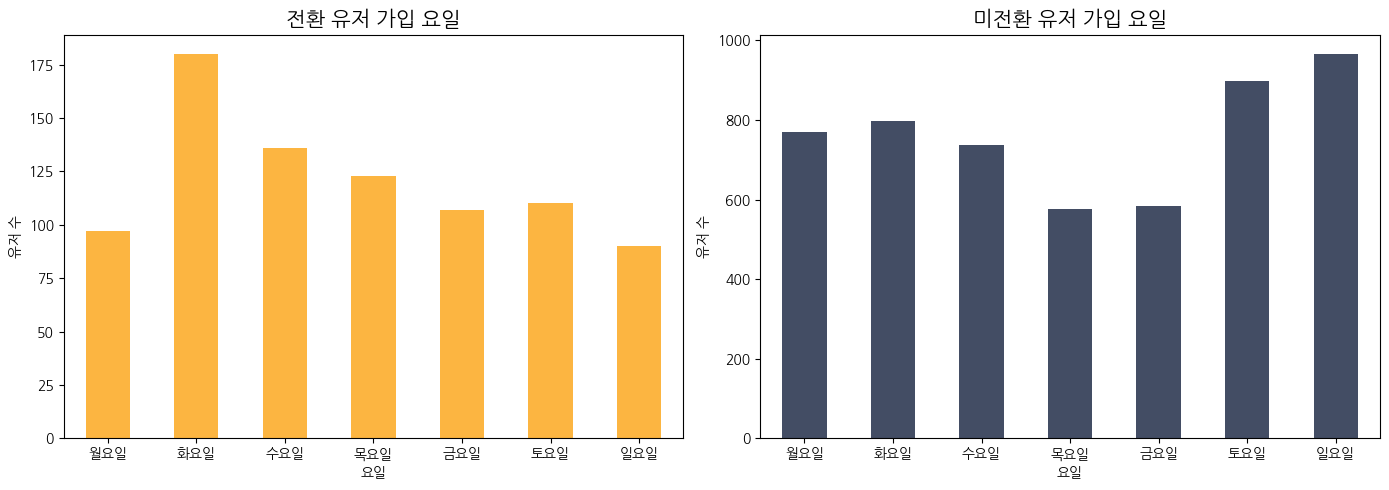

In [72]:
# 성별 분포 (x축 라벨 0도)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
converted_info['gender'].value_counts().plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('전환 유저 성별 분포', fontsize=15)
axes[0].set_xlabel('성별')
axes[0].set_ylabel('유저 수')
axes[0].tick_params(axis='x', labelrotation=0)
not_converted_info['gender'].value_counts().plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('미전환 유저 성별 분포', fontsize=15)
axes[1].set_xlabel('성별')
axes[1].set_ylabel('유저 수')
axes[1].tick_params(axis='x', labelrotation=0)
plt.tight_layout()
plt.show()

# 가입 요일 분포 (x축 라벨 0도)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('전환 유저 가입 요일', fontsize=15)
axes[0].set_xlabel('요일')
axes[0].set_ylabel('유저 수')
axes[0].tick_params(axis='x', labelrotation=0)
not_converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('미전환 유저 가입 요일', fontsize=15)
axes[1].set_xlabel('요일')
axes[1].set_ylabel('유저 수')
axes[1].tick_params(axis='x', labelrotation=0)
plt.tight_layout()
plt.show()

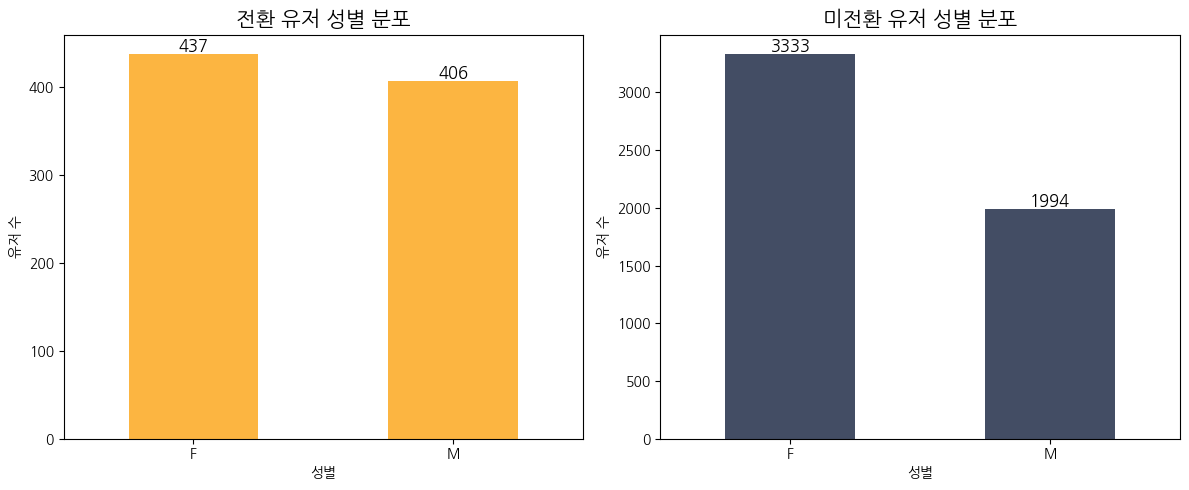

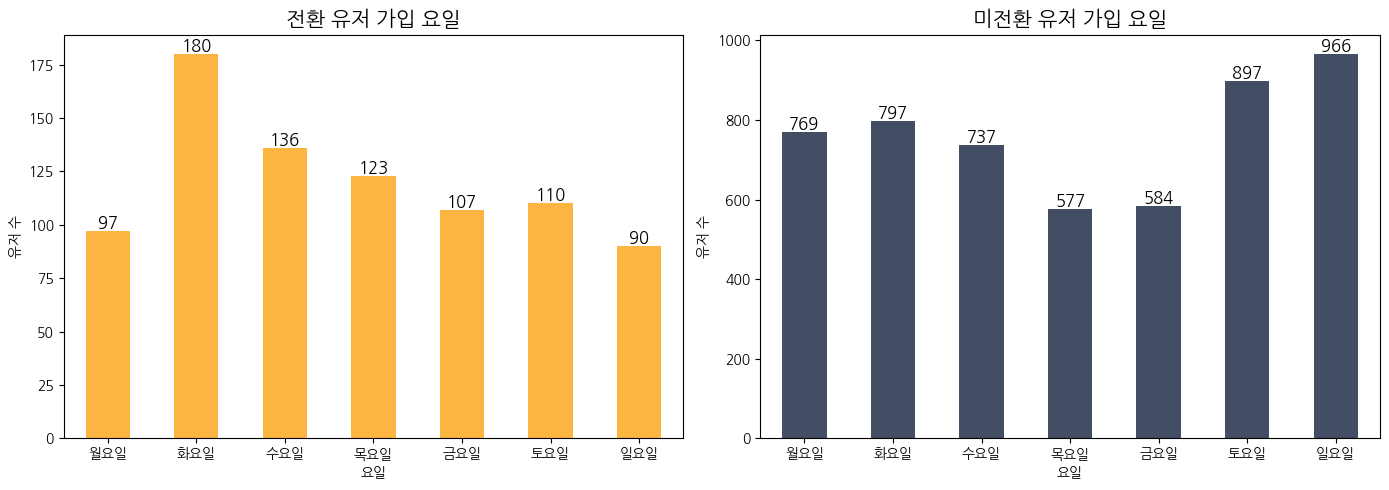

In [103]:
# 성별 분포 (x축 라벨 0도, 바 위에 수치 표시)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
converted_gender_counts = converted_info['gender'].value_counts()
not_converted_gender_counts = not_converted_info['gender'].value_counts()

converted_gender_counts.plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('전환 유저 성별 분포', fontsize=15)
axes[0].set_xlabel('성별')
axes[0].set_ylabel('유저 수')
axes[0].tick_params(axis='x', labelrotation=0)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

not_converted_gender_counts.plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('미전환 유저 성별 분포', fontsize=15)
axes[1].set_xlabel('성별')
axes[1].set_ylabel('유저 수')
axes[1].tick_params(axis='x', labelrotation=0)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# 가입 요일 분포 (x축 라벨 0도, 바 위에 수치 표시)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
converted_weekday_counts = converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor)
not_converted_weekday_counts = not_converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor)

converted_weekday_counts.plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('전환 유저 가입 요일', fontsize=15)
axes[0].set_xlabel('요일')
axes[0].set_ylabel('유저 수')
axes[0].tick_params(axis='x', labelrotation=0)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

not_converted_weekday_counts.plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('미전환 유저 가입 요일', fontsize=15)
axes[1].set_xlabel('요일')
axes[1].set_ylabel('유저 수')
axes[1].tick_params(axis='x', labelrotation=0)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

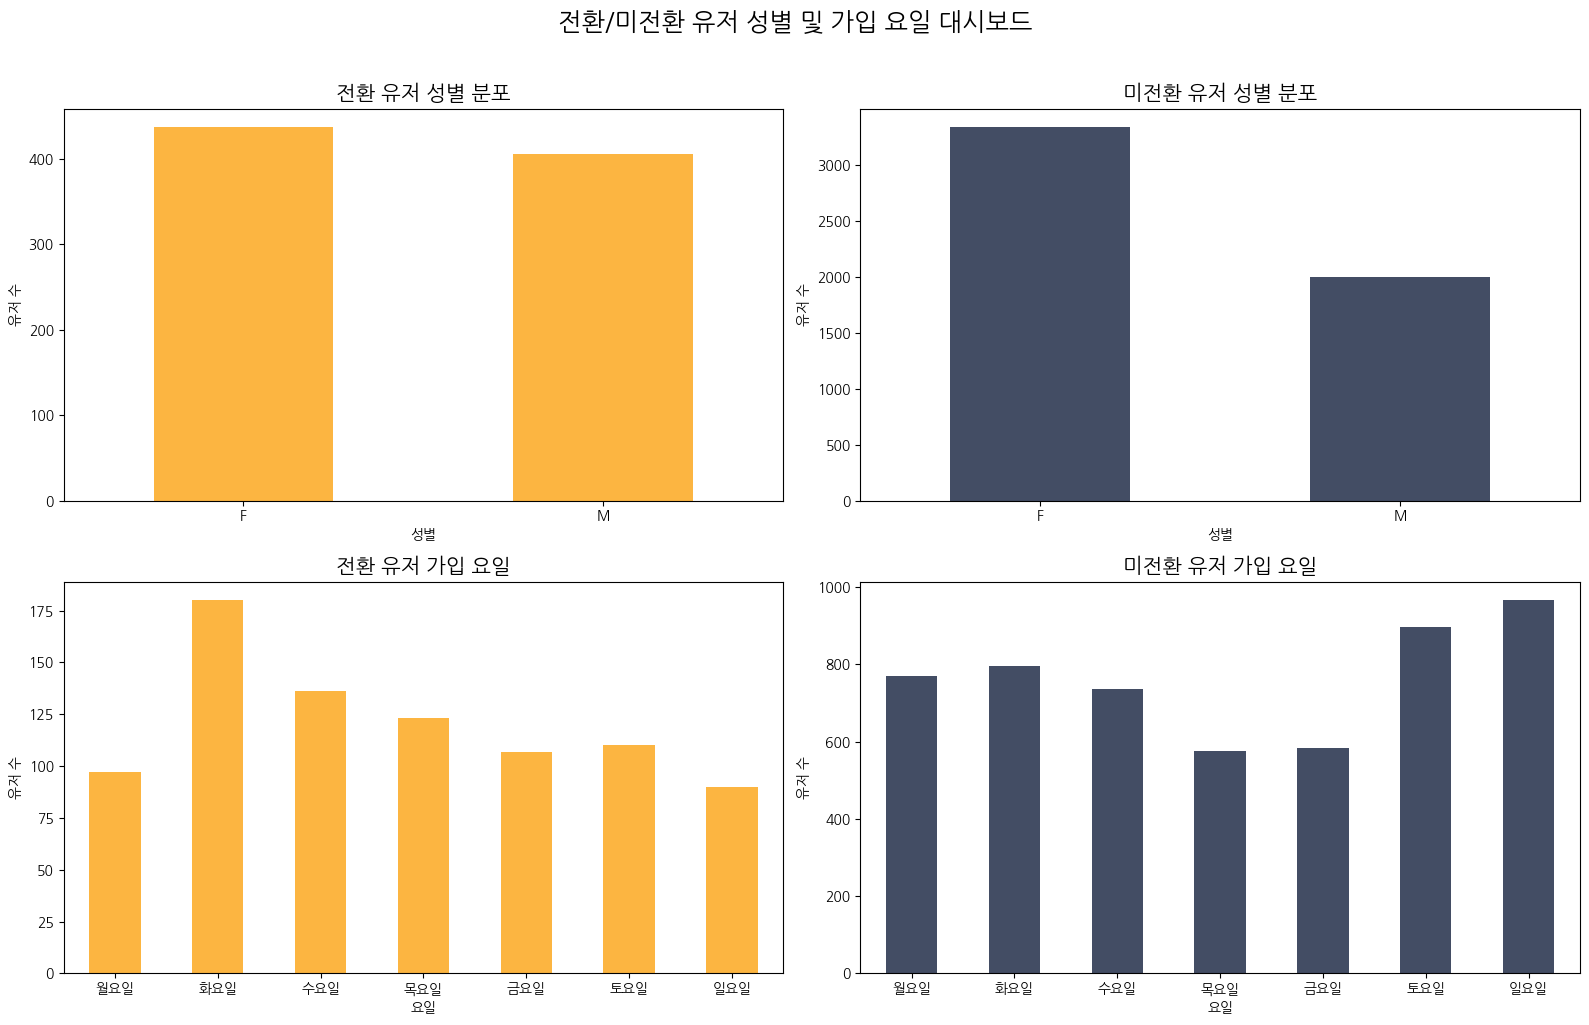

In [73]:
import matplotlib.gridspec as gridspec

# 대시보드 스타일로 2x2 그리드에 그래프 배치
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# 1. 전환 유저 성별 분포
ax1 = fig.add_subplot(gs[0, 0])
converted_info['gender'].value_counts().plot(kind='bar', ax=ax1, color='#fca311', alpha=0.8)
ax1.set_title('전환 유저 성별 분포', fontsize=15)
ax1.set_xlabel('성별')
ax1.set_ylabel('유저 수')
ax1.tick_params(axis='x', labelrotation=0)

# 2. 미전환 유저 성별 분포
ax2 = fig.add_subplot(gs[0, 1])
not_converted_info['gender'].value_counts().plot(kind='bar', ax=ax2, color='#14213d', alpha=0.8)
ax2.set_title('미전환 유저 성별 분포', fontsize=15)
ax2.set_xlabel('성별')
ax2.set_ylabel('유저 수')
ax2.tick_params(axis='x', labelrotation=0)

# 3. 전환 유저 가입 요일 분포
ax3 = fig.add_subplot(gs[1, 0])
converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=ax3, color='#fca311', alpha=0.8)
ax3.set_title('전환 유저 가입 요일', fontsize=15)
ax3.set_xlabel('요일')
ax3.set_ylabel('유저 수')
ax3.tick_params(axis='x', labelrotation=0)

# 4. 미전환 유저 가입 요일 분포
ax4 = fig.add_subplot(gs[1, 1])
not_converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=ax4, color='#14213d', alpha=0.8)
ax4.set_title('미전환 유저 가입 요일', fontsize=15)
ax4.set_xlabel('요일')
ax4.set_ylabel('유저 수')
ax4.tick_params(axis='x', labelrotation=0)

plt.suptitle('전환/미전환 유저 성별 및 가입 요일 대시보드', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

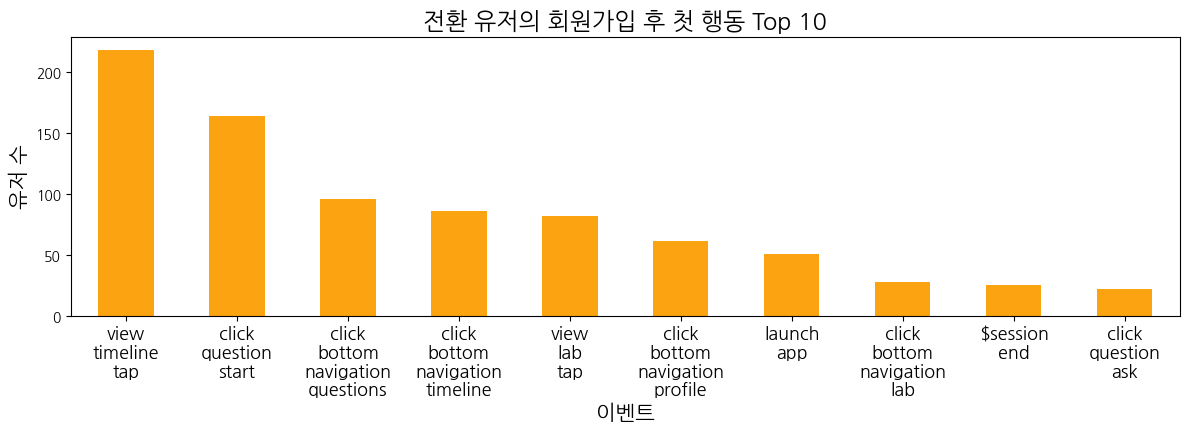

In [74]:
# x축 라벨을 더 읽기 쉽게 줄바꿈 처리 및 폰트 크기/간격 조정
plt.figure(figsize=(12, 6))
ax = first_actions.head(10).plot(kind='bar', color='#fca311')
plt.title('전환 유저의 회원가입 후 첫 행동 Top 10', fontsize=17)
plt.xlabel('이벤트', fontsize=15)
plt.ylabel('유저 수', fontsize=15)
plt.tight_layout()
ax.set_xticklabels([label.replace('_', '\n') for label in first_actions.head(10).index], rotation=0, fontsize=13)
plt.show()

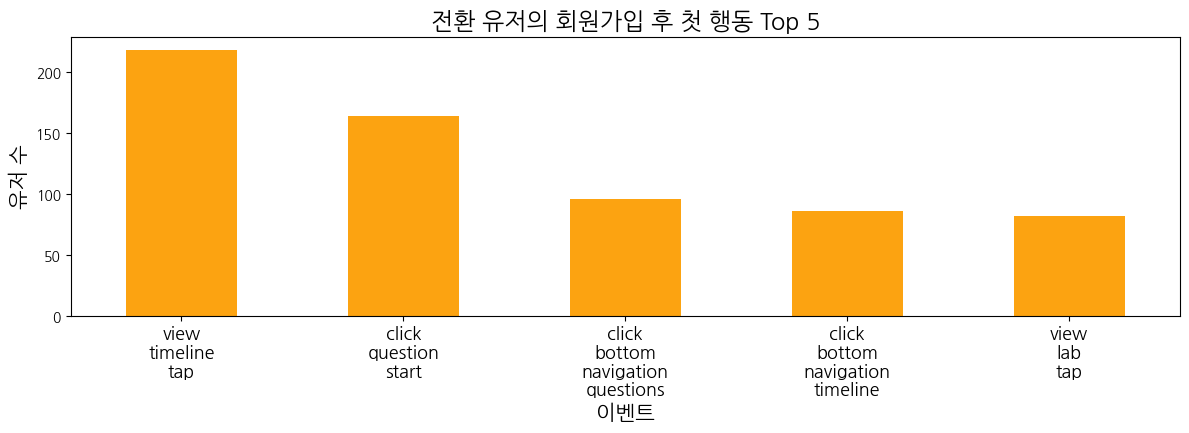

In [75]:
# x축 라벨을 더 읽기 쉽게 줄바꿈 처리 및 폰트 크기/간격 조정 (Top 5만)
plt.figure(figsize=(12, 6))
ax = first_actions.head(5).plot(kind='bar', color='#fca311')
plt.title('전환 유저의 회원가입 후 첫 행동 Top 5', fontsize=17)
plt.xlabel('이벤트', fontsize=15)
plt.ylabel('유저 수', fontsize=15)
plt.tight_layout()
ax.set_xticklabels([label.replace('_', '\n') for label in first_actions.head(5).index], rotation=0, fontsize=13)
plt.show()

In [102]:
# 1. 전체 view_signup 유저 목록에서 complete_signup을 하지 않은 유저 추출 (user_id는 문자열로 통일)
all_view_signup_user_ids = set(view_signup_users.astype(str))
converted_user_ids = set(view_to_complete_users.astype(str))
not_converted_user_ids = list(all_view_signup_user_ids - converted_user_ids)

# 2. 전체 이벤트 로그에서 회원가입하지 않은 유저의 이벤트만 추출
not_converted_events = final_hackle_df[
    final_hackle_df['user_id'].astype(str).isin(not_converted_user_ids)
].copy()

# 3. view_signup 이후 첫 행동 추출 함수 정의
def get_first_action_after_view_signup(df):
    if (df['event_key'] == 'view_signup').any():
        view_signup_time = df[df['event_key'] == 'view_signup']['event_datetime'].min()
        after_view_signup = df[df['event_datetime'] > view_signup_time]['event_key']
        if not after_view_signup.empty:
            return after_view_signup.iloc[0]
        else:
            return None
    else:
        return None

# 4. 유저별로 정렬 후 적용
first_actions_not_converted = (
    not_converted_events.sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .apply(get_first_action_after_view_signup)
    .value_counts()
)

# 5. 결과 출력
print("\n❌ 비전환 유저의 view_signup 이후 첫 행동 Top 10:")
print(first_actions_not_converted.head(10))


❌ 비전환 유저의 view_signup 이후 첫 행동 Top 10:
view_signup          5626
launch_app             18
$session_end           11
$session_start         10
view_login              2
view_timeline_tap       1
Name: count, dtype: int64


### 아래는 발표에서 제외된 내용들
---

In [76]:
# 활성화율 계산 방식 설명
# summary['activation_rate'] = summary['activated'] / summary['signups']
# 즉, 각 그룹(평일/주말, 시간대)별로 회원가입자 중 '활성화 이벤트'를 한 유저 비율입니다.

# 회원가입 이후 최초 5개 이벤트 집계 (가입자별)
# 1. accounts_user의 id와 user_id가 동일하므로, 가입 시각 이후의 이벤트만 추출
# 2. 각 가입자별로 가입 이후 발생한 이벤트 중 상위 5개를 집계

In [77]:
# 문제 원인: signup_users_events_after_signup이 빈 데이터프레임인 이유는
# accounts_user['id']와 signup_users_all_events['user_id']의 타입 또는 값이 정확히 일치하지 않거나,
# signup_time.get(row['user_id'], pd.NaT)에서 user_id가 없어서 모두 NaT가 반환될 수 있습니다.

# 1. user_id와 id의 타입을 모두 str로 맞추기
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. 가입 시각 정보 준비 (id를 str로)
signup_time = accounts_user.set_index('id')['created_at_plus_9'].astype('datetime64[ns]')

# 3. 가입자별 가입 이후 이벤트만 추출
signup_users_events_after_signup = signup_users_all_events[
    signup_users_all_events.apply(
        lambda row: pd.to_datetime(row['event_datetime']) >= signup_time.get(str(row['user_id']), pd.NaT), axis=1
    )
]

# 4. 가입자별 가입 이후 최초 5개 이벤트 추출
first5_events = (
    signup_users_events_after_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 5. 이벤트별 빈도 집계
event_counts = first5_events['event_key'].value_counts()
print("회원가입 이후 최초 5개 이벤트별 빈도:")
print(event_counts.head(20))

/tmp/ipykernel_203008/2109964041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


회원가입 이후 최초 5개 이벤트별 빈도:
event_key
$session_start                       570
complete_signup                      553
view_timeline_tap                    507
view_lab_tap                         478
click_bottom_navigation_timeline     270
click_bottom_navigation_profile      244
click_bottom_navigation_questions    235
click_question_start                 226
skip_question                        183
click_bottom_navigation_lab          144
view_profile_tap                     111
launch_app                           105
click_question_ask                    84
complete_question                     68
view_questions_tap                    64
$session_end                          60
click_appbar_chat_rooms               31
click_attendance                      27
click_appbar_friend_plus              17
view_signup                           14
Name: count, dtype: int64


In [78]:
# user_id별로 complete_signup이 여러 번 있는 경우, 마지막 complete_signup 이후 5개 이벤트만 집계

# 1. user_id와 id의 타입을 모두 str로 맞추기 (이미 맞춰져 있으면 생략 가능)
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. 가입 시각 정보 준비 (id를 str로)
signup_time = accounts_user.set_index('id')['created_at_plus_9'].astype('datetime64[ns]')

# 3. user_id별로 마지막 complete_signup 시각 추출
last_signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 4. 마지막 complete_signup 이후 이벤트만 추출
def after_last_signup(df):
    uid = df['user_id'].iloc[0]
    last_time = last_signup_time.get(uid, pd.NaT)
    if pd.isna(last_time):
        return pd.DataFrame()
    return df[df['event_datetime'] > last_time]

signup_users_events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])
events_after_last_signup = (
    signup_users_events_sorted.groupby('user_id', group_keys=False)
    .apply(after_last_signup)
)

# 5. user_id별로 마지막 complete_signup 이후 최초 5개 이벤트 추출
first5_events_after_last_signup = (
    events_after_last_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 6. 이벤트별 빈도 집계
event_counts = first5_events_after_last_signup['event_key'].value_counts()
print("마지막 complete_signup 이후 최초 5개 이벤트별 빈도:")
print(event_counts.head(20))

/tmp/ipykernel_203008/245444692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


마지막 complete_signup 이후 최초 5개 이벤트별 빈도:
event_key
view_lab_tap                         781
view_timeline_tap                    754
click_bottom_navigation_profile      408
click_bottom_navigation_timeline     387
click_bottom_navigation_questions    382
click_bottom_navigation_lab          287
skip_question                        282
click_question_start                 264
view_profile_tap                     220
click_question_ask                   125
launch_app                           125
view_questions_tap                   112
complete_question                     97
$session_end                          71
$session_start                        64
click_appbar_chat_rooms               42
click_appbar_setting                  37
click_attendance                      32
click_appbar_friend_plus              31
view_signup                           21
Name: count, dtype: int64


위 경우를 보면 생각보다 실험실 탭에 들어가는 경우가 많은데 그렇다면 실험실에 다양한 기능이 있는지 확인 및 해보고 싶은 행동들이 있을 수 잇음     
-> 실험실에 대해서 만족도 == 실험실에 머무는 시간이 긴가?
- 실험실 탭에 들어가서 머무는 시간이 긴 유저와 짧은 유저의 차이?

   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        102            0.189
1       False     Night   178965        232            0.130
2       False     Other   211760        275            0.130
3        True     Lunch    37907         32            0.084
4        True     Night    99098         80            0.081
5        True     Other    95425         77            0.081


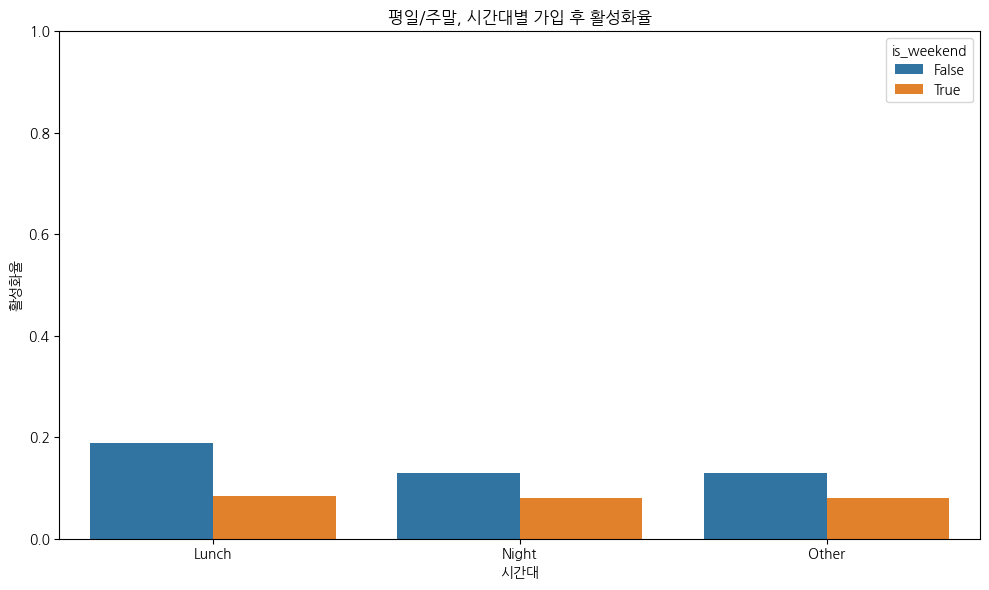

In [79]:
# 평일/주말, 시간대별 가입자 수 및 이후 활성화율(예: 첫 활성화 이벤트 발생 비율) 비교

# 1. 가입자 데이터에서 요일/시간대 컬럼 생성
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
accounts_user['hour'] = accounts_user['created_at_plus_9'].dt.hour

# 평일/주말 구분
accounts_user['is_weekend'] = accounts_user['weekday'].isin(['Saturday', 'Sunday'])

# 시간대 구분 (예: 밤(21~6), 점심(11~14), 기타)
def time_slot(hour):
    if 21 <= hour or hour < 6:
        return 'Night'
    elif 11 <= hour < 15:
        return 'Lunch'
    else:
        return 'Other'
accounts_user['time_slot'] = accounts_user['hour'].apply(time_slot)

# 2. 가입자별 첫 활성화(Activation) 이벤트 발생 여부 집계
activation_keys = ['view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_timeline'
                   ,'view_timeline_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_lab'
                   , 'skip_question', 'click_question_start', 'view_profile_tap','click_question_ask']

# 가입자 user_id별로 첫 활성화 이벤트 발생 여부
activation_df = signup_users_all_events[signup_users_all_events['event_key'].isin(activation_keys)]
activated_users = activation_df['user_id'].unique()
accounts_user['activated'] = accounts_user['id'].astype(str).isin(activated_users)

# 3. 평일/주말, 시간대별 가입자 수 및 활성화율 집계
summary = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated', 'sum'))
    .reset_index()
)
summary['activation_rate'] = round(summary['activated'] / summary['signups'] * 100,3)

print(summary)

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend'
)
plt.title('평일/주말, 시간대별 가입 후 활성화율')
plt.ylabel('활성화율')
plt.xlabel('시간대')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

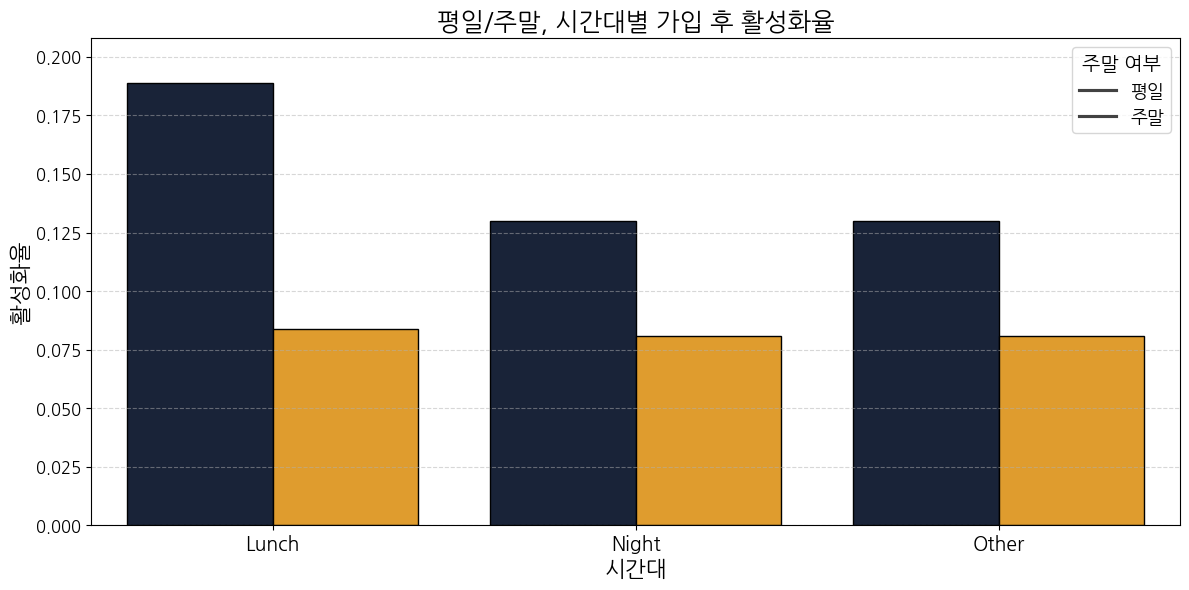

In [80]:
# 평일/주말, 시간대별 가입 후 활성화율 시각화 (디자인/폰트/컬러 규격 적용)

plt.figure(figsize=(12, 6))
bar_colors = ['#14213d', '#fca311']  # 평일/주말 컬러
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend',
    palette=bar_colors,
    edgecolor='black'
)
plt.title('평일/주말, 시간대별 가입 후 활성화율', fontsize=18)
plt.ylabel('활성화율', fontsize=16)
plt.xlabel('시간대', fontsize=16)
plt.ylim(0, summary['activation_rate'].max() * 1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='주말 여부', labels=['평일', '주말'], fontsize=13, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

활성화 이벤트(activation_keys)에 포함된 이벤트가 너무 제한적이거나, 실제로 가입 직후 발생하는 이벤트와 맞지 않을 수 있습니다. 또는 'activated' 조건이 너무 엄격할 수 있습니다.

### 회원가입 후 활성화율에 대한 내용(시간에 따른 한번이라도 이벤트 발생했는지 여부)
---

In [81]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 5분 이내 이벤트 필터링
events['within_5min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=5))
)

# 4. 5분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_5min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_5min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_5min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_5min', 'sum'))
    .reset_index()
)
summary_5min['activation_rate'] = round(summary_5min['activated'] / summary_5min['signups'] * 100,3)

print(summary_5min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104            0.193
1       False     Night   178965        239            0.134
2       False     Other   211760        276            0.130
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087


In [82]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 10분 이내 이벤트 필터링
events['within_10min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=10))
)

# 4. 10분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_10min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_10min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_10min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_10min', 'sum'))
    .reset_index()
)
summary_10min['activation_rate'] = round(summary_10min['activated'] / summary_10min['signups'],3)

print(summary_10min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.002
1       False     Night   178965        240            0.001
2       False     Other   211760        278            0.001
3        True     Lunch    37907         30            0.001
4        True     Night    99098         76            0.001
5        True     Other    95425         83            0.001


In [83]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 30분 이내 이벤트 필터링
events['within_30min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=30))
)

# 4. 30분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_30min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_30min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_30min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_30min', 'sum'))
    .reset_index()
)
summary_30min['activation_rate'] = round(summary_30min['activated'] / summary_30min['signups'] * 100,3)

print(summary_30min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.195
1       False     Night   178965        241            0.135
2       False     Other   211760        278            0.131
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087


In [84]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 1시간 이내 이벤트 필터링
events['within_1hour'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(hours=1))
)

# 4. 1시간 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_1hour'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_1hour'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_1hour = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_1hour', 'sum'))
    .reset_index()
)
summary_1hour['activation_rate'] = round(summary_1hour['activated'] / summary_1hour['signups'] *100,3)

print(summary_1hour)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.195
1       False     Night   178965        241            0.135
2       False     Other   211760        278            0.131
3        True     Lunch    37907         30            0.079
4        True     Night    99098         77            0.078
5        True     Other    95425         83            0.087


In [85]:
events_copy = events.copy()
accounts_copy = accounts_user.copy()

In [86]:
def time_event_activation_summary(time_unit: str, amount: int):
    # time_unit: 'minutes' 또는 'hours'
    delta = pd.Timedelta(**{time_unit: amount})  # 동적으로 처리
    

    # 3. 가입 후 지정 시간 이내 이벤트 필터링
    events_copy['within_time'] = (
        (events_copy['event_datetime'] > events_copy['signup_time']) &
        (events_copy['event_datetime'] <= events_copy['signup_time'] + delta)
    )
    
    # 4. 해당 시간 내 이벤트가 있는 user_id 추출
    activated_users = events_copy.loc[events_copy['within_time'], 'user_id'].drop_duplicates()

    # 5. 활성화 여부 컬럼 생성
    accounts_copy['activated_time'] = accounts_copy['id'].astype(str).isin(activated_users)

    # 6. 그룹별 활성화율 집계
    summary_time = (
        accounts_copy
        .groupby(['is_weekend', 'time_slot'])
        .agg(signups=('id', 'count'), activated=('activated_time', 'sum'))
        .reset_index()
    )
    summary_time['activation_rate'] = round(summary_time['activated'] / summary_time['signups']* 100,3)
    
    print(f"== 가입 후 {amount} {time_unit} 내 활성화 ==")
    print(summary_time)
    print("="*60)

In [87]:
time_event_activation_summary('minutes', 5)
time_event_activation_summary('minutes', 10)
time_event_activation_summary('minutes', 30)
time_event_activation_summary('hours', 1)

== 가입 후 5 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104            0.193
1       False     Night   178965        239            0.134
2       False     Other   211760        276            0.130
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087
== 가입 후 10 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.195
1       False     Night   178965        240            0.134
2       False     Other   211760        278            0.131
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087
== 가입 후 30 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0 

/tmp/ipykernel_203008/1081828344.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


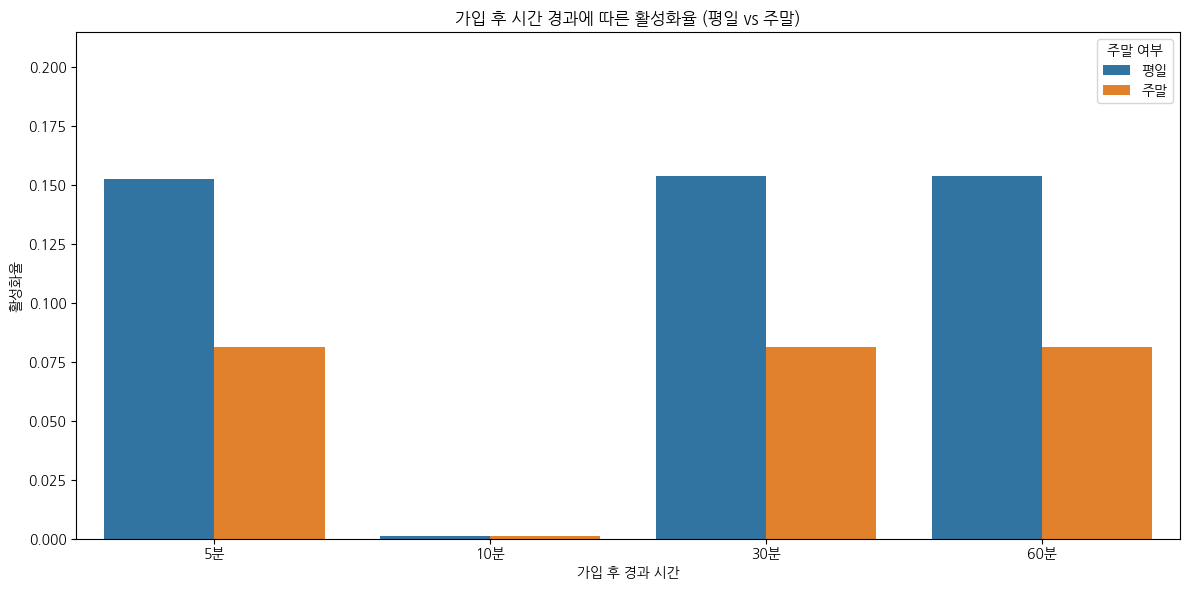

In [88]:
# 가입 후 5, 10, 30, 60분 내 활성화율 summary 데이터프레임을 하나로 합쳐서 시각화

# 각 summary 데이터프레임에 시간 구분 컬럼 추가
summary_5min['time'] = '5분'
summary_10min['time'] = '10분'
summary_30min['time'] = '30분'
summary_1hour['time'] = '60분'

# 하나의 데이터프레임으로 합치기
activation_summary_all = pd.concat([
    summary_5min,
    summary_10min,
    summary_30min,
    summary_1hour
], ignore_index=True)

# 시각화: 시간별, 평일/주말별, 시간대별 활성화율 변화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=activation_summary_all,
    x='time',
    y='activation_rate',
    hue='is_weekend',
    ci=None
)
plt.title('가입 후 시간 경과에 따른 활성화율 (평일 vs 주말)')
plt.ylabel('활성화율')
plt.xlabel('가입 후 경과 시간')
plt.ylim(0, activation_summary_all['activation_rate'].max() * 1.1)
plt.legend(title='주말 여부', labels=['평일', '주말'])
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/4221451942.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


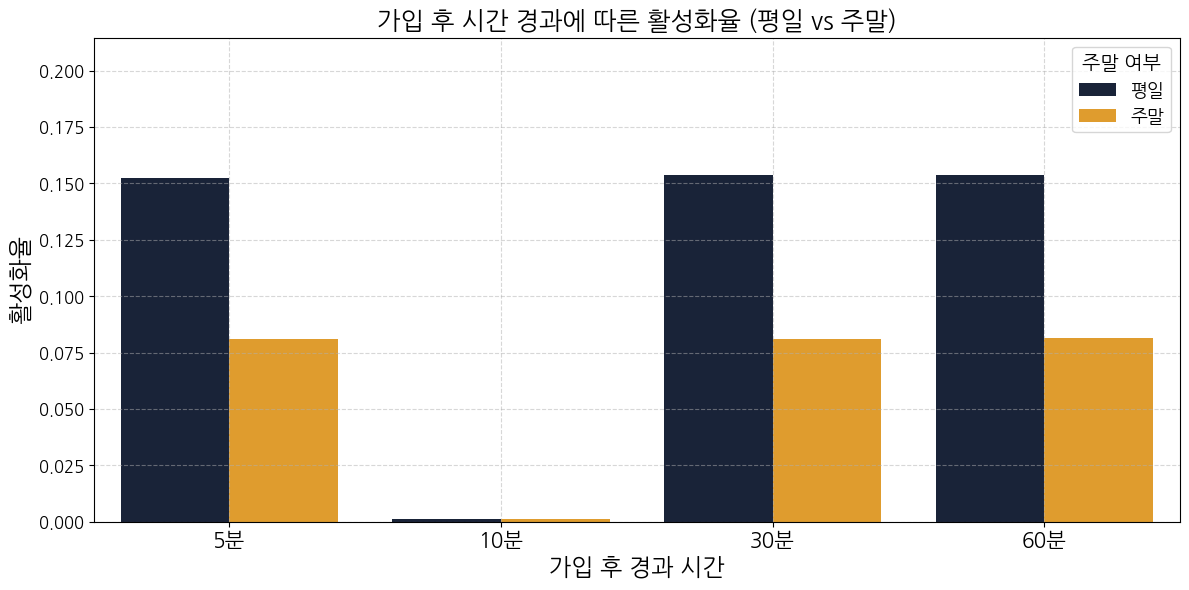

In [89]:
# 가입 후 5, 10, 30, 60분 내 활성화율 summary 데이터프레임을 하나로 합쳐서 시각화 (디자인/폰트/컬러 규격 적용)

# 각 summary 데이터프레임에 시간 구분 컬럼 추가
summary_5min['time'] = '5분'
summary_10min['time'] = '10분'
summary_30min['time'] = '30분'
summary_1hour['time'] = '60분'

# 하나의 데이터프레임으로 합치기
activation_summary_all = pd.concat([
    summary_5min,
    summary_10min,
    summary_30min,
    summary_1hour
], ignore_index=True)

# 시각화: 시간별, 평일/주말별, 시간대별 활성화율 변화 (디자인 적용)
plt.figure(figsize=(12, 6))
bar_colors = ['#14213d', '#fca311']  # 평일/주말 컬러
sns.barplot(
    data=activation_summary_all,
    x='time',
    y='activation_rate',
    hue='is_weekend',
    palette=bar_colors,
    ci=None
)
plt.title('가입 후 시간 경과에 따른 활성화율 (평일 vs 주말)', fontsize=18)
plt.ylabel('활성화율', fontsize=17)
plt.xlabel('가입 후 경과 시간', fontsize=17)
plt.ylim(0, activation_summary_all['activation_rate'].max() * 1.1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title='주말 여부', labels=['평일', '주말'], fontsize=13, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

가입 후 5~60분까지의 반응을 분석한 결과, 대부분의 유저는 가입 이후 아무 이벤트도 발생시키지 않는 것으로 나타났습니다.       
시간 기준을 5분 → 1시간으로 넓혀도 활성화율 증가는 0.001%p 수준에 불과했습니다.

특히, 평일에 비해 주말 유저의 활성화율이 더 낮아, 유입 품질 또는 초기 온보딩 구조 개선이 필요해 보입니다.       
이는 단순한 대기 시간의 문제라기보다는, 근본적으로 '가입만 하고 이탈하는 유저' 비중이 높은 것으로 해석됩니다.

In [90]:
# 1. 실험실 탭 진입 이벤트를 정의 (예: 'view_lab_tap' 또는 'click_bottom_navigation_lab' 등)
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']

# 2. 회원가입 완료한 유저(user_id) 중 실험실 탭에 한번이라도 들어간 유저 추출
lab_users = signup_users_all_events[signup_users_all_events['event_key'].isin(lab_tab_events)]['user_id'].unique()

# 3. 전체 회원가입 완료 유저 수
total_signup_users = accounts_user['id'].astype(str).nunique()

# 4. 실험실 탭 진입 유저 수
lab_users_count = len(lab_users)

# 5. 비율 계산
lab_user_ratio = lab_users_count / total_signup_users * 100
print(f"회원가입 완료 유저 중 실험실 탭에 한번이라도 들어간 유저 비율: {lab_user_ratio:.2f}% ({lab_users_count}/{total_signup_users})")

# 6. 실험실 탭 진입 유저의 회원가입 일자 추출
lab_users_signup_dates = accounts_user[accounts_user['id'].astype(str).isin(lab_users)][['id', 'created_at_plus_9']]
print("실험실 탭 진입 유저의 회원가입 일자(상위 10개):")
print(lab_users_signup_dates.head(10))

회원가입 완료 유저 중 실험실 탭에 한번이라도 들어간 유저 비율: 0.13% (903/677085)
실험실 탭 진입 유저의 회원가입 일자(상위 10개):
             id          created_at_plus_9
72498    923658 2023-05-06 23:58:56.451591
113297   967617 2023-05-07 21:59:18.841842
149013  1006061 2023-05-08 20:39:06.627464
326836  1199005 2023-05-13 14:34:29.760474
342954  1216565 2023-05-13 21:00:16.936982
387777  1265729 2023-05-14 22:43:19.358770
400739  1279934 2023-05-15 15:16:11.978139
441807  1324867 2023-05-16 21:27:32.600137
502317  1391728 2023-05-20 00:51:35.212829
631289  1534869 2023-05-28 16:56:12.336732


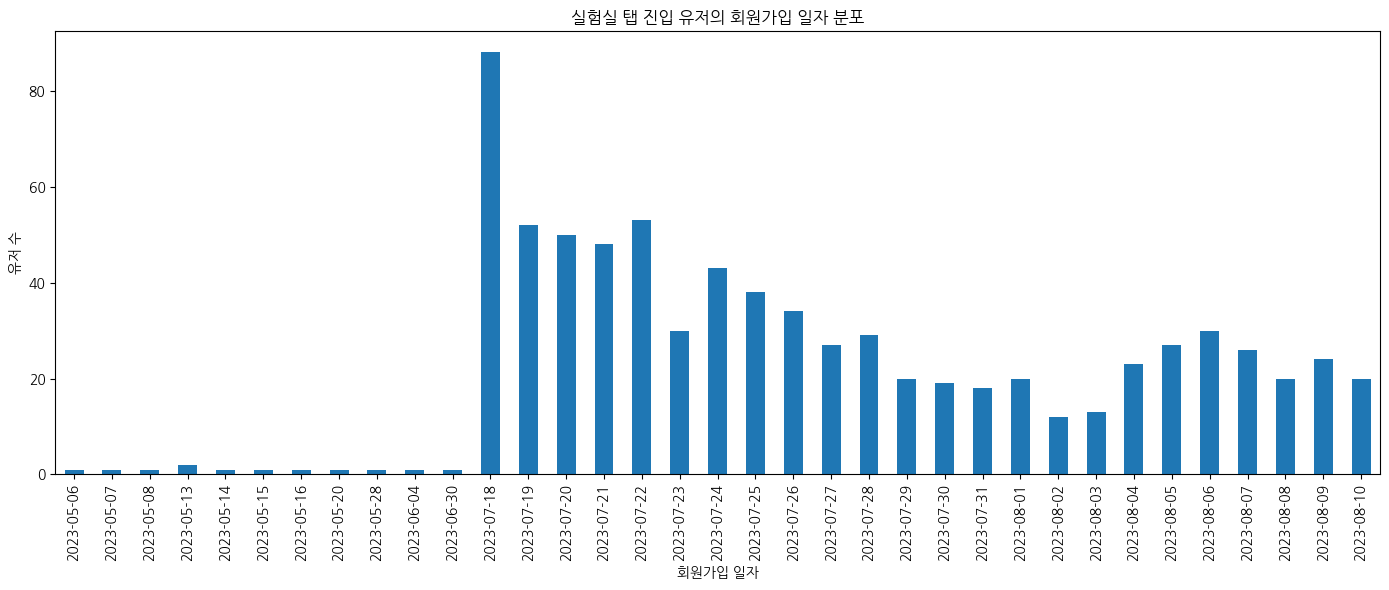

실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 평균 소요 시간: 1528.93분
실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 중앙값 소요 시간: 1.34분


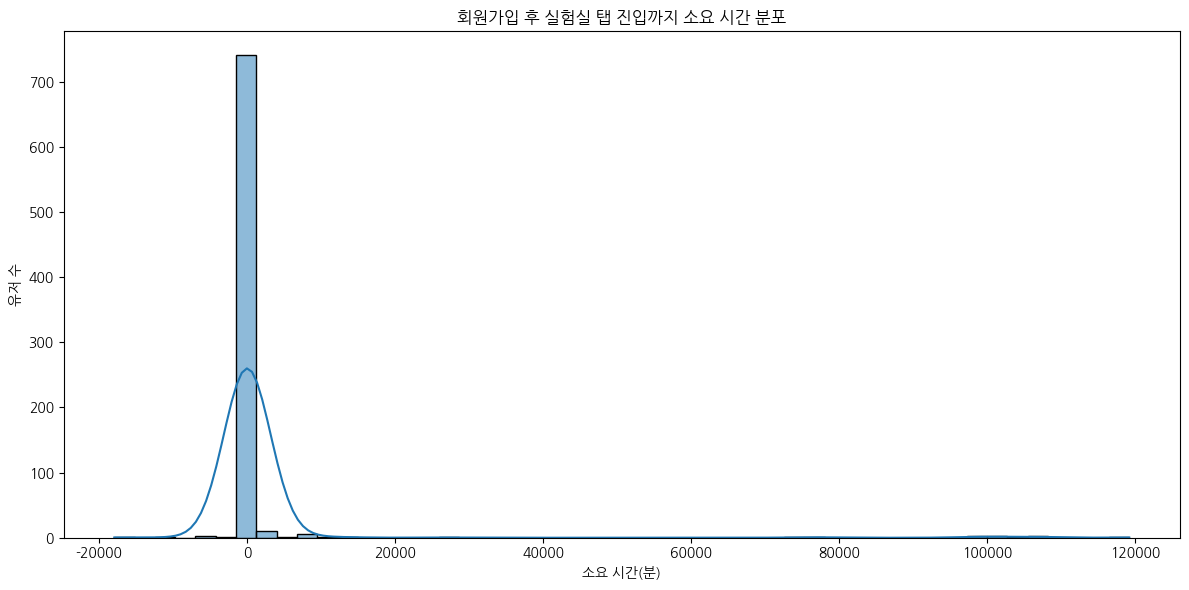

In [91]:
# 실험실 탭 진입 유저의 회원가입 일자 시각화
plt.figure(figsize=(14, 6))
lab_users_signup_dates['created_at_plus_9'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('실험실 탭 진입 유저의 회원가입 일자 분포')
plt.xlabel('회원가입 일자')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 걸린 시간(분) 계산
# 1. 실험실 탭 진입 이벤트만 추출
lab_events = signup_users_all_events[signup_users_all_events['user_id'].isin(lab_users) &
                                    signup_users_all_events['event_key'].isin(lab_tab_events)].copy()

# 2. 회원가입 일자 정보 merge
lab_events = lab_events.merge(
    lab_users_signup_dates.rename(columns={'id': 'user_id'}),
    on='user_id',
    how='left'
)

# 3. 회원가입 후 실험실 탭 진입까지 걸린 시간(분) 계산 (최초 진입만)
lab_events['signup_to_lab_min'] = (lab_events['event_datetime'] - lab_events['created_at_plus_9']).dt.total_seconds() / 60
first_lab_events = lab_events.sort_values(['user_id', 'event_datetime']).groupby('user_id').first()

# 4. 평균, 중앙값 출력
mean_time = first_lab_events['signup_to_lab_min'].mean()
median_time = first_lab_events['signup_to_lab_min'].median()
print(f"실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 평균 소요 시간: {mean_time:.2f}분")
print(f"실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 중앙값 소요 시간: {median_time:.2f}분")

# 5. 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(first_lab_events['signup_to_lab_min'], bins=50, kde=True)
plt.title('회원가입 후 실험실 탭 진입까지 소요 시간 분포')
plt.xlabel('소요 시간(분)')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

In [92]:
# 1. 실험실 관련 이벤트가 7월 18일 이전에 있었는지 확인
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']
lab_events_before_july18 = signup_users_events[ 
    (signup_users_events['event_key'].isin(lab_tab_events)) &
    (signup_users_events['event_datetime'] < pd.Timestamp('2023-07-18'))
]
print(f"7월 18일 이전 실험실 관련 이벤트 수: {len(lab_events_before_july18)}")
if not lab_events_before_july18.empty:
    display(lab_events_before_july18[['event_datetime', 'event_key', 'user_id']].head())

7월 18일 이전 실험실 관련 이벤트 수: 0


In [93]:
# signup_users_events 데이터프레임에서 가장 많이 발생한 이벤트 확인
event_counts = signup_users_events['event_key'].value_counts()
print("가장 많이 발생한 이벤트 Top 10:")
print(event_counts.head(10))

가장 많이 발생한 이벤트 Top 10:
event_key
view_lab_tap                         21946
view_timeline_tap                    21016
click_question_open                  19641
launch_app                           14839
$session_start                       13603
click_bottom_navigation_questions    13243
skip_question                        13161
$session_end                         12075
click_bottom_navigation_profile      11866
click_bottom_navigation_timeline      8273
Name: count, dtype: int64


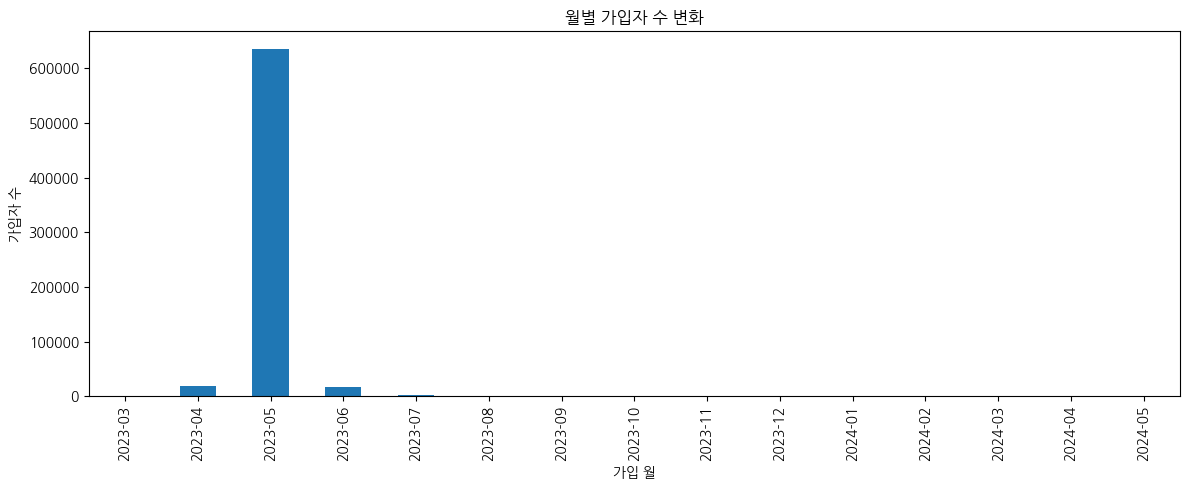

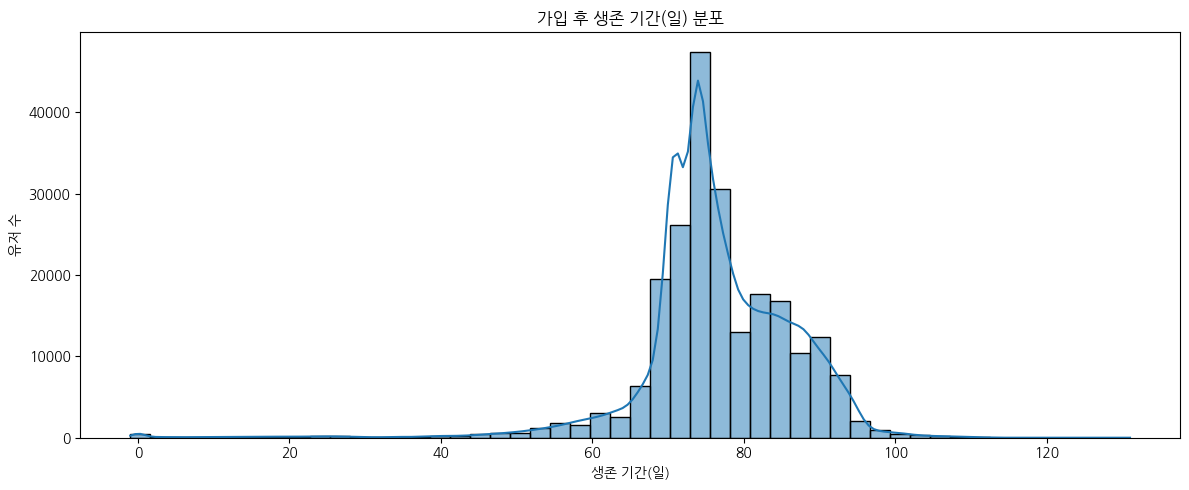

생존 기간 평균: 76.40일
생존 기간 중간값: 75.00일
30일 이상 잔존 유저 수: 125175


In [94]:
# 가입자 수 변화(5~6월 급증) 및 가입 후 생존 기간, 장기 잔존 유저 코호트 정의

# accounts_user: vote 데이터(가입자 정보)
# final_hackle_df: 행동 로그 데이터

# 1. 가입자 수 변화 (월별)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()
plt.figure(figsize=(12, 5))
monthly_signup_counts.plot(kind='bar')
plt.title('월별 가입자 수 변화')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

# 2. 가입 후 생존 기간 계산 (최종 이벤트 시각 - 가입 시각)
user_last_event = final_hackle_df.groupby('user_id')['event_datetime'].max()
accounts_user['user_id'] = accounts_user['id'].astype(str)
accounts_user['last_event_time'] = accounts_user['user_id'].map(user_last_event)
accounts_user['survival_days'] = (accounts_user['last_event_time'] - accounts_user['created_at_plus_9']).dt.days

# 3. 생존 기간별 유저의 수 시각화 및 통계치 출력
plt.figure(figsize=(12, 5))
sns.histplot(accounts_user['survival_days'].dropna(), bins=50, kde=True)
plt.title('가입 후 생존 기간(일) 분포')
plt.xlabel('생존 기간(일)')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 생존 기간의 평균, 중간값 계산
mean_survival = accounts_user['survival_days'].mean()
median_survival = accounts_user['survival_days'].median()
print(f"생존 기간 평균: {mean_survival:.2f}일")
print(f"생존 기간 중간값: {median_survival:.2f}일")

# 4. 장기 잔존 유저(예: 가입 후 30일 이상 활동) 정의
accounts_user['is_retained_median_day'] = accounts_user['survival_days'] >= median_survival
retained_users = accounts_user.loc[accounts_user['is_retained_median_day'], 'user_id'].tolist()
print(f"30일 이상 잔존 유저 수: {len(retained_users)}")

In [95]:
# 잔존 유저의 행동 패턴 분석 (final_hackle 데이터)
retained_events = final_hackle_df[final_hackle_df['user_id'].isin(retained_users)].copy()

# 잔존 유저의 주요 이벤트 빈도
top_events = retained_events['event_key'].value_counts().head(10)
print("잔존 유저 주요 이벤트 Top 10:")
print(top_events)

# # 잔존 유저별 첫 10개 이벤트 시퀀스
# retained_event_sequences = (
#     retained_events.sort_values(['user_id', 'event_datetime'])
#     .groupby('user_id')['event_key']
#     .apply(lambda x: list(x.head(10)))
# )
# print("잔존 유저 첫 10개 이벤트 시퀀스 예시:")
# print(retained_event_sequences.head())

잔존 유저 주요 이벤트 Top 10:
event_key
view_lab_tap                         847889
view_timeline_tap                    829738
$session_start                       658433
launch_app                           650380
click_question_open                  527482
click_bottom_navigation_questions    487966
click_bottom_navigation_profile      431673
$session_end                         425621
click_bottom_navigation_timeline     357669
skip_question                        316179
Name: count, dtype: int64
